In [1]:
import pandas as pd
import numpy as np

In [2]:
dataset=pd.read_csv('dataset.tsv', sep='\t')

/home/abdul/anaconda3/envs/BDA/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
display(dataset)

,user_id_hashed,profile_type,user_create_date,user_language,age_years_bucket,user_country_code,transfer_submit_time,deposit_receive_time,transfer_amount_gbp,payment_status,payment_reference_classification,source_currency_code,target_currency_code
0,aa2cdd43ea,Personal,2016-09-19,EN,5. 46-60,191,2016-09-29 12:04:06.000000,2016-09-29 12:07:02.000000,6056,Transferred,blank,3,33
1,eeaca17571,Personal,2016-08-04,EN,3. 26-34,134,2016-09-29 12:04:39.000000,2016-09-29 15:41:19.000000,1359,Transferred,monthly,1,26
2,42fe418c52,Personal,2016-09-29,EN,3. 26-34,134,2016-09-29 12:06:46.000000,2016-09-29 12:25:39.000000,1571,Transferred,Other/unknown,2,26
3,e5594025fa,Personal,2016-06-24,FR,3. 26-34,178,2016-09-29 12:08:38.000000,2016-09-30 17:50:27.000000,8323,Transferred,Other/unknown,9,14
4,c2946ed453,Personal,2016-05-20,EN,3. 26-34,134,2016-09-29 12:08:56.000000,2016-09-29 12:10:45.000000,1571,Transferred,blank,2,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...
72357,c83513c579,Personal,2016-09-29,EN,2. 18-25,134,2016-09-29 06:15:35.000000,NaN,?,Cancelled,blank,1,26
72358,c83513c579,Personal,2016-09-29,EN,2. 18-25,134,2016-09-29 06:18:48.000000,NaN,?,Cancelled,blank,1,26
72359,50916f3a39,Personal,2016-09-29,EN,2. 18-25,134,2016-09-29 10:33:18.000000,2016-09-29 10:41:52.000000,?,Transferred,Other/unknown,6,26
72360,88c42e38b3,Personal,2016-01-27,US,2. 18-25,134,2016-09-29 10:51:43.000000,2016-09-29 10:54:11.000000,?,Transferred,blank,1,26


In [4]:
for feature in (dataset.columns.values.tolist()):
    print(feature)


user_id_hashed
profile_type
user_create_date
user_language
age_years_bucket
user_country_code
transfer_submit_time
deposit_receive_time
transfer_amount_gbp
payment_status
payment_reference_classification
source_currency_code
target_currency_code


In [5]:
print(dataset.dtypes)

user_id_hashed                      object
profile_type                        object
user_create_date                    object
user_language                       object
age_years_bucket                    object
user_country_code                    int64
transfer_submit_time                object
deposit_receive_time                object
transfer_amount_gbp                 object
payment_status                      object
payment_reference_classification    object
source_currency_code                 int64
target_currency_code                 int64
dtype: object


In [6]:
dataset=dataset.replace('?',np.nan)
dataset=dataset.replace(" ",np.nan)
dataset=dataset.replace("",np.nan)

In [7]:
#dataset['user_id_hashed'] = dataset['user_id_hashed'].astype('int')
dataset['transfer_amount_gbp'] = dataset['transfer_amount_gbp'].astype('float')
dataset['profile_type'] = dataset['profile_type'].astype('category')
dataset['user_language'] = dataset['user_language'].astype('category')
dataset['age_years_bucket'] = dataset['age_years_bucket'].astype('category')
dataset['user_country_code'] = dataset['user_country_code'].astype('category')
dataset['payment_reference_classification'] = dataset['payment_reference_classification'].astype('category')
dataset['payment_status'] = dataset['payment_status'].astype('category')
dataset['source_currency_code'] = dataset['source_currency_code'].astype('category')
dataset['target_currency_code'] = dataset['target_currency_code'].astype('category')
dataset['transfer_amount_gbp'] = pd.to_numeric(dataset['transfer_amount_gbp'])
dataset['transfer_submit_time']=pd.to_datetime(dataset['transfer_submit_time'])
dataset['deposit_receive_time']=pd.to_datetime(dataset['deposit_receive_time'])
dataset['user_create_date']=pd.to_datetime(dataset['user_create_date'])
dataset.dtypes

user_id_hashed                              object
profile_type                              category
user_create_date                    datetime64[ns]
user_language                             category
age_years_bucket                          category
user_country_code                         category
transfer_submit_time                datetime64[ns]
deposit_receive_time                datetime64[ns]
transfer_amount_gbp                        float64
payment_status                            category
payment_reference_classification          category
source_currency_code                      category
target_currency_code                      category
dtype: object

In [8]:
dataset.isnull().sum()

user_id_hashed                          0
profile_type                            0
user_create_date                        0
user_language                           0
age_years_bucket                        0
user_country_code                       0
transfer_submit_time                    0
deposit_receive_time                30979
transfer_amount_gbp                  4239
payment_status                          0
payment_reference_classification        0
source_currency_code                    0
target_currency_code                    0
dtype: int64

In [9]:
least_recent_date = dataset['transfer_submit_time'].min().date()
recent_date = dataset['transfer_submit_time'].max().date()

print("records contain transfer subits from ", least_recent_date, " to ", recent_date )

records contain transfer subits from  2016-01-01  to  2017-03-12


In [10]:
for column in dataset.columns.values:
    if ("time" in column) or ("date" in column) or ("id" in column):
        continue
    else:
        print("\n\nColumn [", column, "] \n\nUnique Values", dataset[column].unique())
        print(dataset[column].describe())



Column [ profile_type ] 

Unique Values [Personal, Business]
Categories (2, object): [Personal, Business]
count        72362
unique           2
top       Personal
freq         71273
Name: profile_type, dtype: object


Column [ user_language ] 

Unique Values [EN, FR, IT, RU, US, ES, DE, PT, JA, HU]
Categories (10, object): [EN, FR, IT, RU, ..., DE, PT, JA, HU]
count     72362
unique       10
top          EN
freq      57000
Name: user_language, dtype: object


Column [ age_years_bucket ] 

Unique Values [5. 46-60, 3. 26-34, 4. 36-45, 6. 61+, 2. 18-25]
Categories (5, object): [5. 46-60, 3. 26-34, 4. 36-45, 6. 61+, 2. 18-25]
count        72362
unique           5
top       3. 26-34
freq         41105
Name: age_years_bucket, dtype: object


Column [ user_country_code ] 

Unique Values [191, 134, 178, 215, 233, ..., 93, 217, 179, 46, 54]
Length: 78
Categories (78, int64): [191, 134, 178, 215, ..., 217, 179, 46, 54]
count     72362
unique       78
top         134
freq      41614
Name: user_

In [11]:
dataset['transfer_amount_gbp'].where(dataset['transfer_amount_gbp'] > 5000)


data_greaterthan_5000=dataset[(dataset.transfer_amount_gbp > 5000) ].nlargest(21, 'transfer_amount_gbp')
data_greaterthan_5000

,user_id_hashed,profile_type,user_create_date,user_language,age_years_bucket,user_country_code,transfer_submit_time,deposit_receive_time,transfer_amount_gbp,payment_status,payment_reference_classification,source_currency_code,target_currency_code
4544,c98ade9edb,Personal,2016-10-17,EN,6. 61+,130,2016-10-18 15:12:44,NaT,1763860.0,Cancelled,blank,9,27
4550,c98ade9edb,Personal,2016-10-17,EN,6. 61+,130,2016-10-18 15:22:50,NaT,1763860.0,Cancelled,blank,9,27
4556,c98ade9edb,Personal,2016-10-17,EN,6. 61+,130,2016-10-18 15:43:20,NaT,1763860.0,Cancelled,blank,9,27
4500,c98ade9edb,Personal,2016-10-17,EN,6. 61+,130,2016-10-18 12:47:19,NaT,1682892.0,Cancelled,blank,1,3
4512,c98ade9edb,Personal,2016-10-17,EN,6. 61+,130,2016-10-18 13:26:47,NaT,1682892.0,Cancelled,blank,1,3
4531,c98ade9edb,Personal,2016-10-17,EN,6. 61+,130,2016-10-18 14:37:04,NaT,1682892.0,Cancelled,blank,1,70
6186,fe49426271,Personal,2016-10-26,EN,4. 36-45,134,2016-10-26 13:32:08,NaT,1680372.0,Cancelled,blank,1,26
59997,92290c40a1,Business,2016-08-13,EN,4. 36-45,134,2016-08-13 16:10:23,NaT,1627456.0,Cancelled,blank,1,26
59999,92290c40a1,Business,2016-08-13,EN,4. 36-45,134,2016-08-13 16:12:32,NaT,1627456.0,Cancelled,blank,1,26
57686,a80739069f,Business,2016-06-23,EN,4. 36-45,134,2016-07-25 18:55:47,NaT,1579883.0,Cancelled,blank,1,26


In [12]:
distinct_in_top100 = np.unique(data_greaterthan_5000['user_id_hashed'].values.tolist())

print("distinct_in_top100 :  ",len(distinct_in_top100))

distinct_in_top100 :   10


In [13]:
dataset['user_id_hashed'].value_counts().to_dict()

{'ddbac55d04': 152,
 '40f82150ce': 135,
 '886c375df1': 105,
 '299d30f1fd': 99,
 '081ab20e3c': 96,
 '894ed8b166': 95,
 '08f3b20f31': 92,
 '4ac45656b6': 86,
 '91c757d0c2': 81,
 '90d0725242': 80,
 '978d5dd61b': 77,
 '0b2e16a2bf': 74,
 '5bc078ba04': 68,
 '4f768961a2': 67,
 '1032c11b65': 67,
 '2aec234093': 66,
 '034fef01e1': 65,
 '7d0acef7ed': 61,
 'ce50572781': 60,
 '54ad07e0dc': 59,
 'cf80c9cd4f': 57,
 '24028d9228': 56,
 '1b68a94b27': 56,
 'b90f6ea6c4': 55,
 '76ee3458fd': 55,
 '41b86568b4': 55,
 'dc80095232': 53,
 '6b11229061': 53,
 '244ffde7fc': 53,
 'c7ca956697': 50,
 'a9b7eb165e': 50,
 '8a432db0c3': 49,
 'c5652a1283': 48,
 'f4b49253a4': 47,
 'a09a05cee4': 47,
 '30b657186c': 47,
 '1ff849420a': 47,
 '8a2b897ad5': 46,
 'f5b2bb5172': 46,
 '6f0a0fc800': 46,
 'cda6969f51': 46,
 '77490ceeef': 46,
 '16e66a5778': 46,
 'dcdbf0a9ff': 46,
 'd3ee7cc7b4': 45,
 '74919cc51a': 45,
 '714621c686': 45,
 '8b080f95bb': 45,
 '101c55aa34': 45,
 '2cd2a94c14': 44,
 '372c49e1ed': 44,
 '44cdaa7b7f': 44,
 '48c8b1f

In [14]:
#dataset.groupby('user_id_hashed')['transfer_amount_gbp'].transform('sum')
dataset['sum_of_this_user']=dataset.groupby(['user_id_hashed'])['transfer_amount_gbp'].transform('sum')
top_10users_byTotalTransferSum=dataset.drop_duplicates(subset='user_id_hashed').nlargest(10, 'sum_of_this_user')
top_10users_byTotalTransferSum[['user_id_hashed','sum_of_this_user']]

,user_id_hashed,sum_of_this_user
22371,d71d16e6b5,18849552.0
20501,3ca94ac42b,13432664.0
4500,c98ade9edb,10340256.0
19227,4b2f28326e,9896016.0
38317,3d7cc6fe80,6529974.0
23137,610b87481a,4366814.0
38363,e065dca6e7,4313022.0
11490,3ee46219a3,3994339.0
67202,9701e297dc,3583548.0
50963,37900a9e60,3568898.0


In [15]:
dataset['deposit_receive_time_check'] =  dataset['deposit_receive_time']
dataset['deposit_receive_time_check'] = dataset['deposit_receive_time_check'].replace(np.nan, "Nan")
dataset.loc[(dataset.deposit_receive_time_check != "Nan"),'deposit_receive_time_check']="Existing"
dataset['deposit_receive_time_check'] = dataset['deposit_receive_time_check'].astype('category')

dataset['transfer_amount_gbp_check'] =  dataset['transfer_amount_gbp']
dataset['transfer_amount_gbp_check'] = dataset['transfer_amount_gbp_check'].replace(np.nan, "Nan")
dataset.loc[(dataset.transfer_amount_gbp_check != "Nan"),'transfer_amount_gbp_check']="Existing"
dataset['transfer_amount_gbp_check'] = dataset['transfer_amount_gbp_check'].astype('category')

In [16]:
def plot_1(dataset,col_name,x_size=9,y_size=6):
    import matplotlib.pyplot as plt
    %matplotlib inline     
        # allows to output plots in the notebook
    plt.style.use("ggplot")     # Set the default style
    plt.rcParams['figure.dpi'] = 250
    plt.rcParams['figure.figsize'] = (x_size,y_size)
    table=pd.crosstab(dataset[col_name],dataset.transfer_amount_gbp_check)
    table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True,color = ['g','red'])
    plt.title('Existence of Transfer Amount GBP for '+ col_name )
    plt.xlabel(col_name)
    plt.ylabel('Ratio of Existing vs. Non Existing ')
    #plt.savefig('/home/abdul/Desktop/TransferwiseDataScience/figs/Existence_of_Transfer_Amount_GBP_for_'+ col_name , dpi='figure',bbox_inches = 'tight')

def plot_2(dataset,col_name,x_size=9,y_size=6):
    import matplotlib.pyplot as plt
    %matplotlib inline     
        # allows to output plots in the notebook
    plt.style.use("ggplot")     # Set the default style
    plt.rcParams['figure.dpi'] = 250
    plt.rcParams['figure.figsize'] = (x_size,y_size)
    table=pd.crosstab(dataset[col_name],dataset.deposit_receive_time_check)
    table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True,color = ['g','red'])
    plt.title('Existence of Deposit Received Time for '+ col_name )
    plt.xlabel(col_name)
    plt.ylabel('Ratio of Existing vs. Non Existing ')
    #plt.savefig('/home/abdul/Desktop/TransferwiseDataScience/figs/Existence_of_Deposit_Received_Time_for_'+ col_name, dpi='figure',bbox_inches = 'tight')


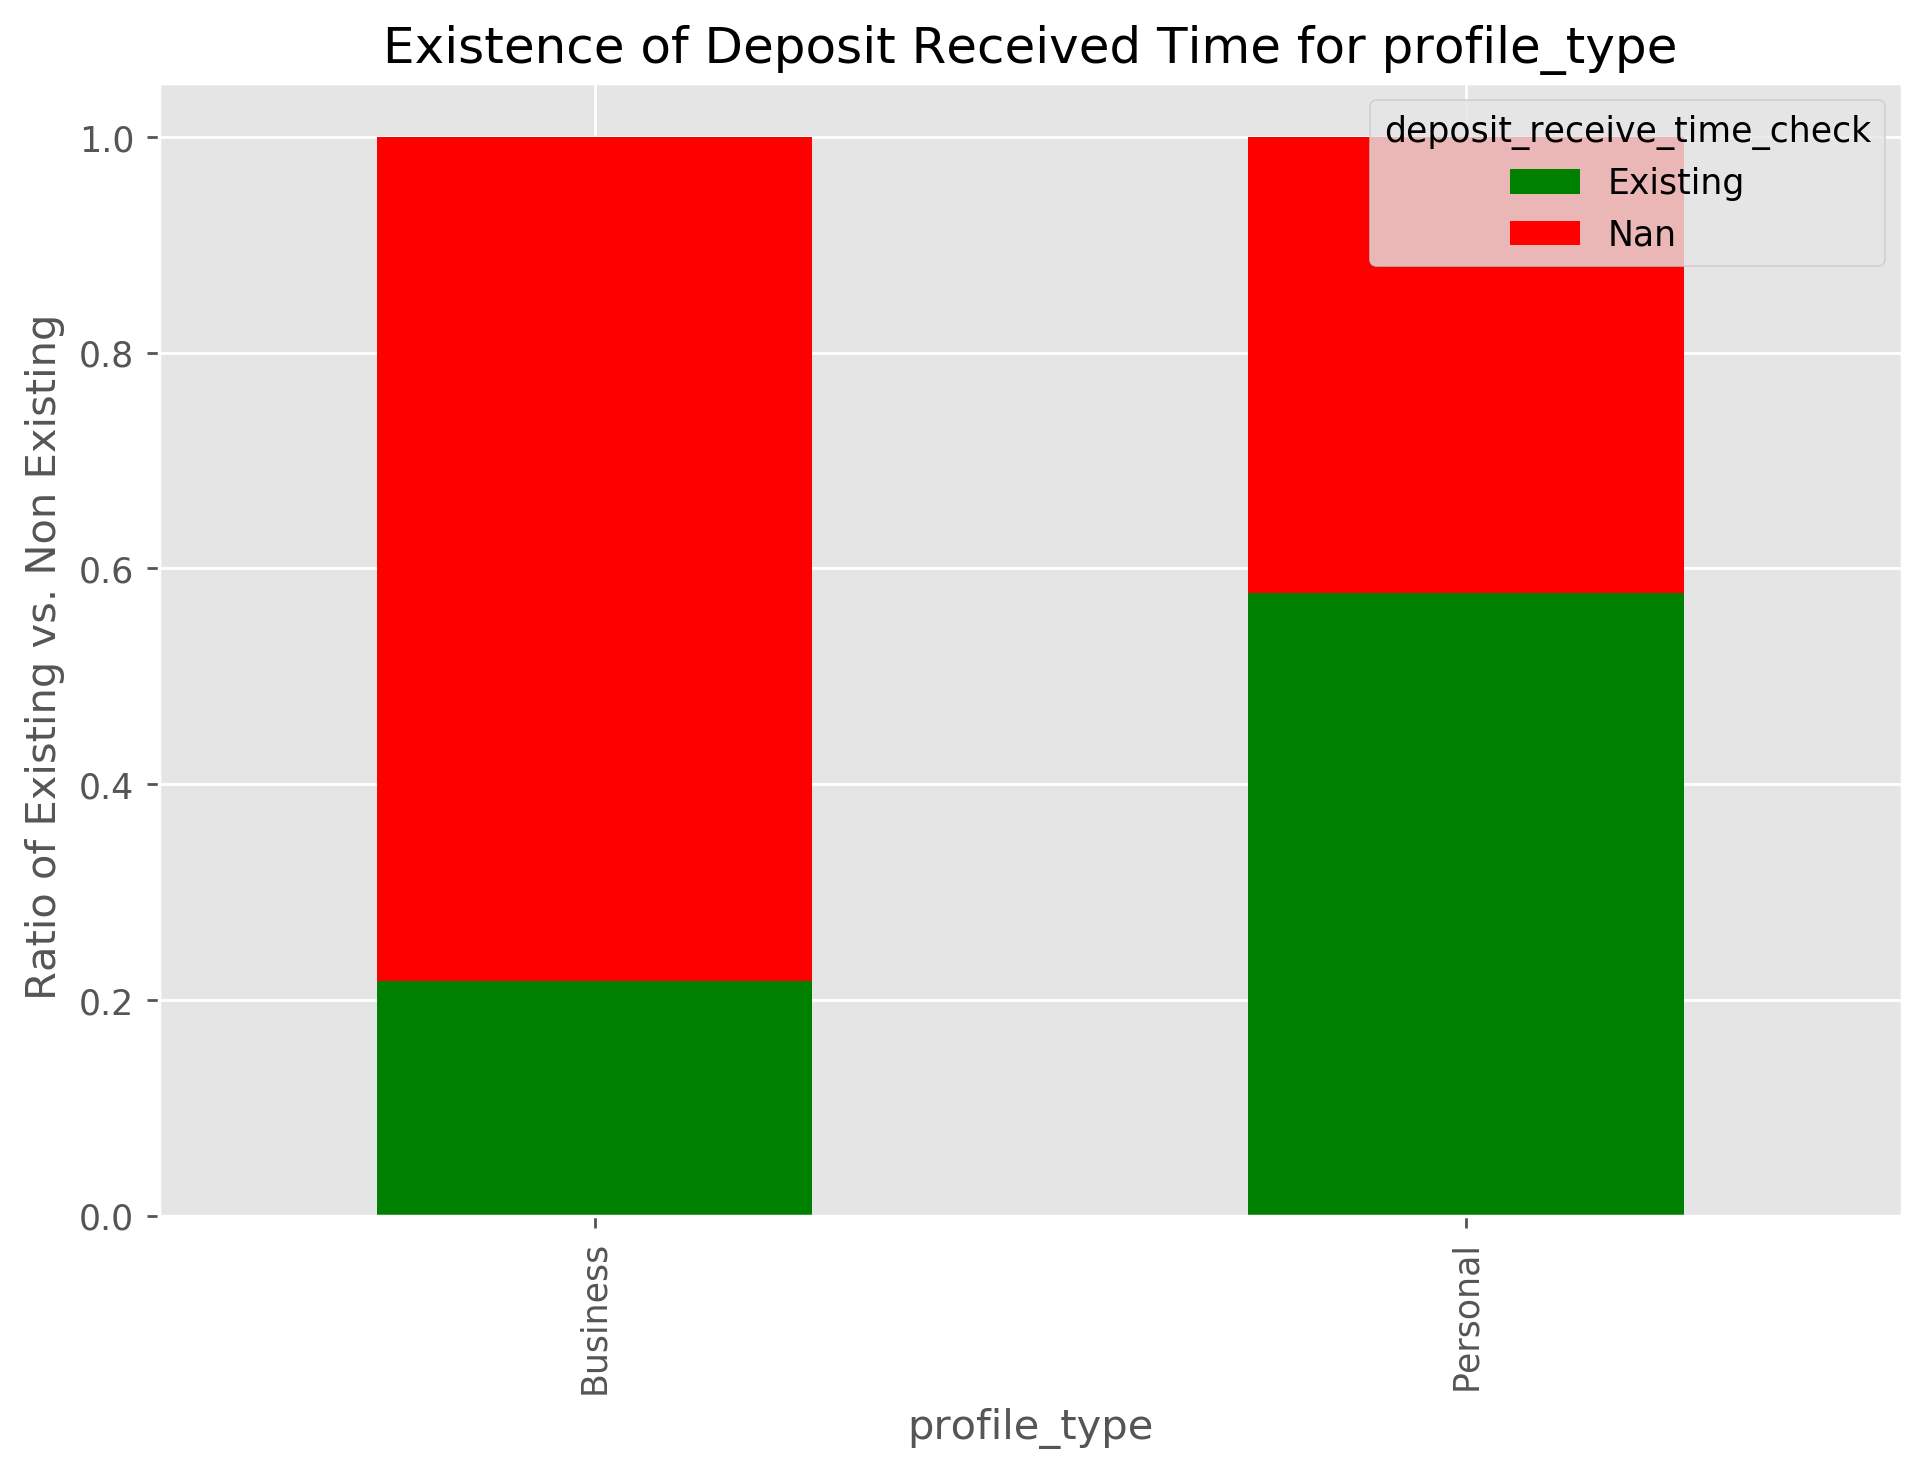

In [17]:
plot_2(dataset,"profile_type")

In [18]:
dataset[(dataset.profile_type == 'Business') &\
        (dataset.deposit_receive_time_check=="Nan")].describe(include=['category']) 

,profile_type,user_language,age_years_bucket,user_country_code,payment_status,payment_reference_classification,source_currency_code,target_currency_code,deposit_receive_time_check,transfer_amount_gbp_check
count,852,852,852,852,852,852,852,852,852,852
unique,1,7,5,31,1,16,14,27,1,2
top,Business,EN,3. 26-34,134,Cancelled,blank,3,26,Nan,Existing
freq,852,794,371,494,852,534,314,425,852,678


**Records with the Profile Type category of business contain a high ratio of missing deposit received time values. Around 80% of 'Business' profile type records are missing deposit received time values. However, most of these have Payment Status as 'Cancelled'.**

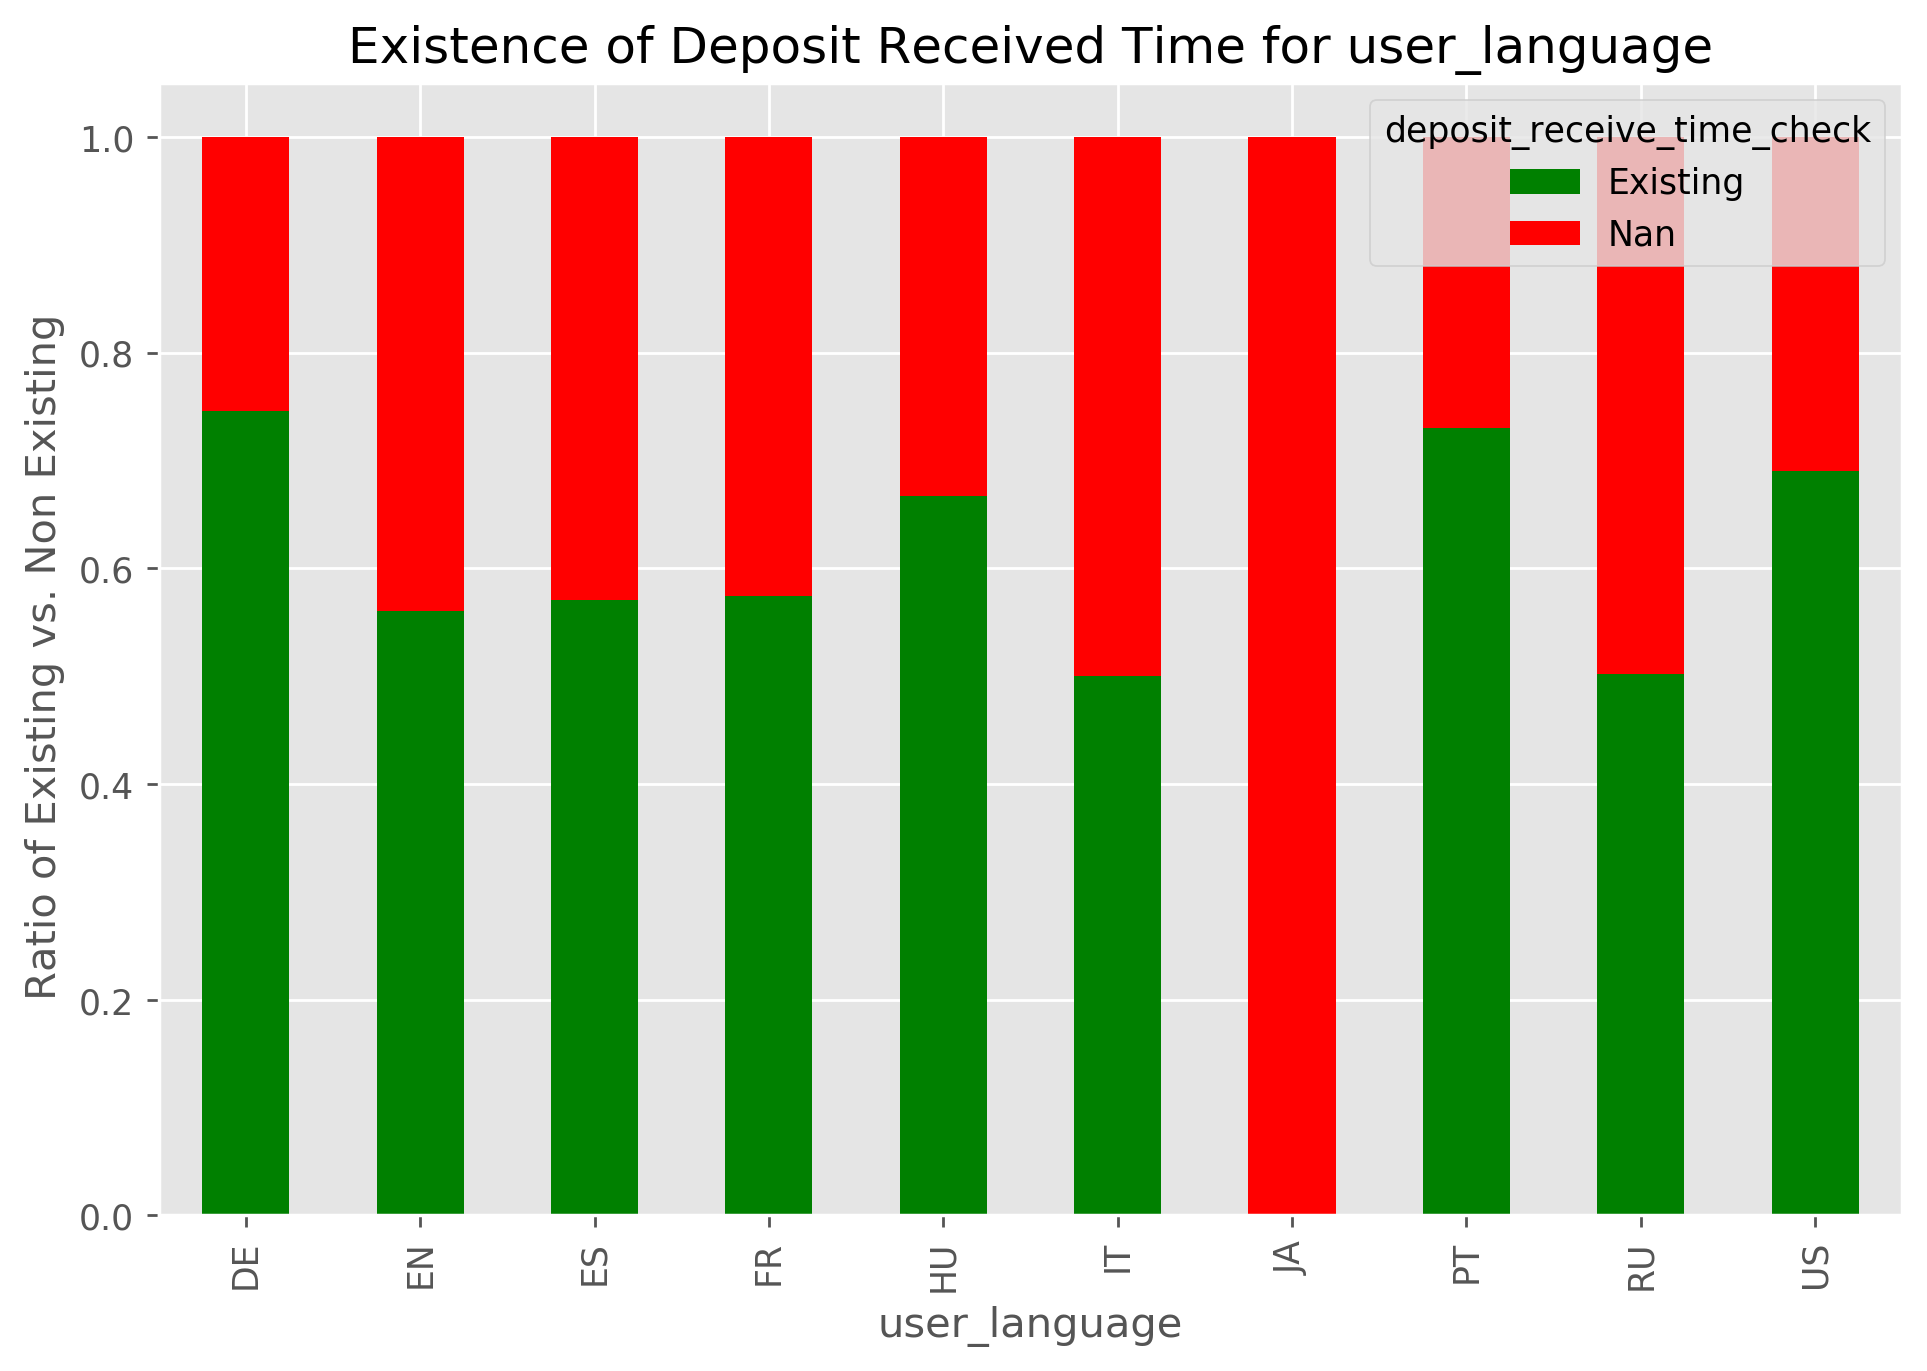

In [19]:
plot_2(dataset,"user_language")

In [20]:
dataset[(dataset.user_language == 'JA') & (dataset.deposit_receive_time_check=="Nan")].shape[0] 

2

**Records with the User Language category of 'JA' are entirely missing deposit received time values. This is not the case with any other user language category.However number of records with missing values with missing deposit received time values for 'JA' language category are only 2 out of 72k. Hence, missing values cannot be attributed to the user language being 'JA'**

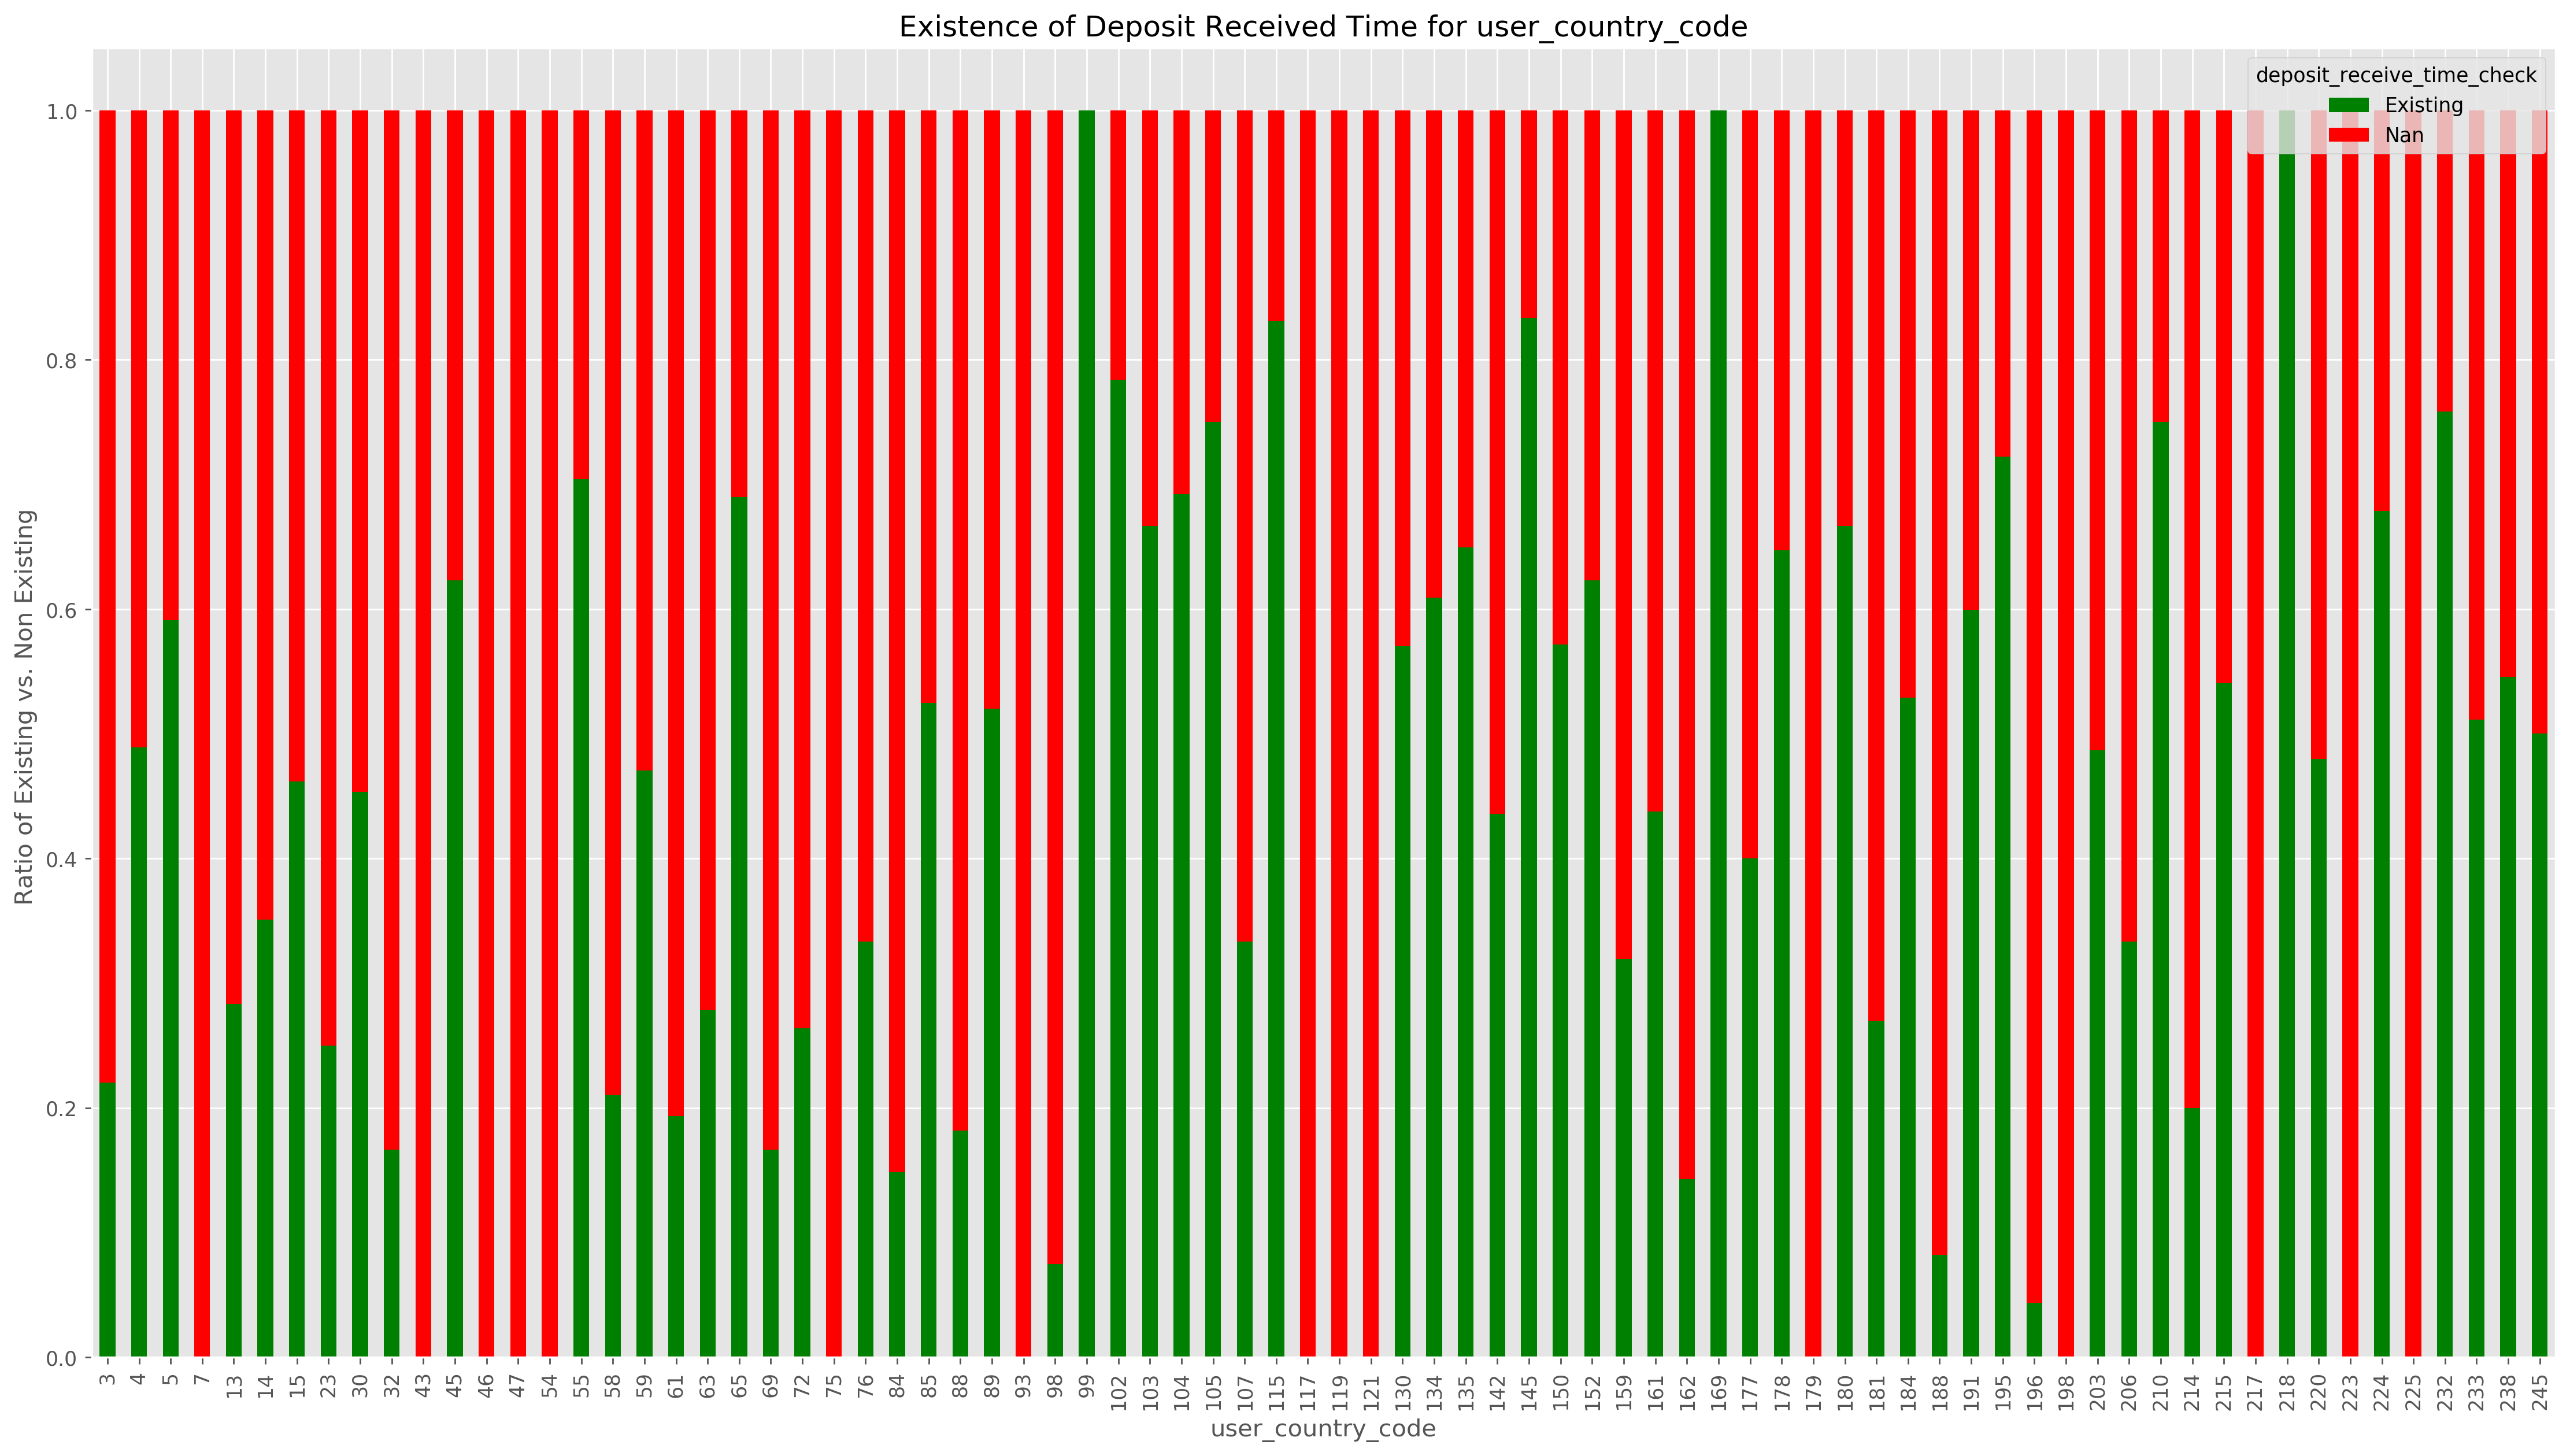

In [21]:
plot_2(dataset,"user_country_code",x_size=22,y_size=12)

Almost all the records(>96%) with 'Cancelled' payment status are missing deposit received time values while none of the records with 'Transferred' payment status are missing deposit recived time values. Hence the mising of Dposit Received time values can be logically attributed to the  'Cancelled' payment status.  


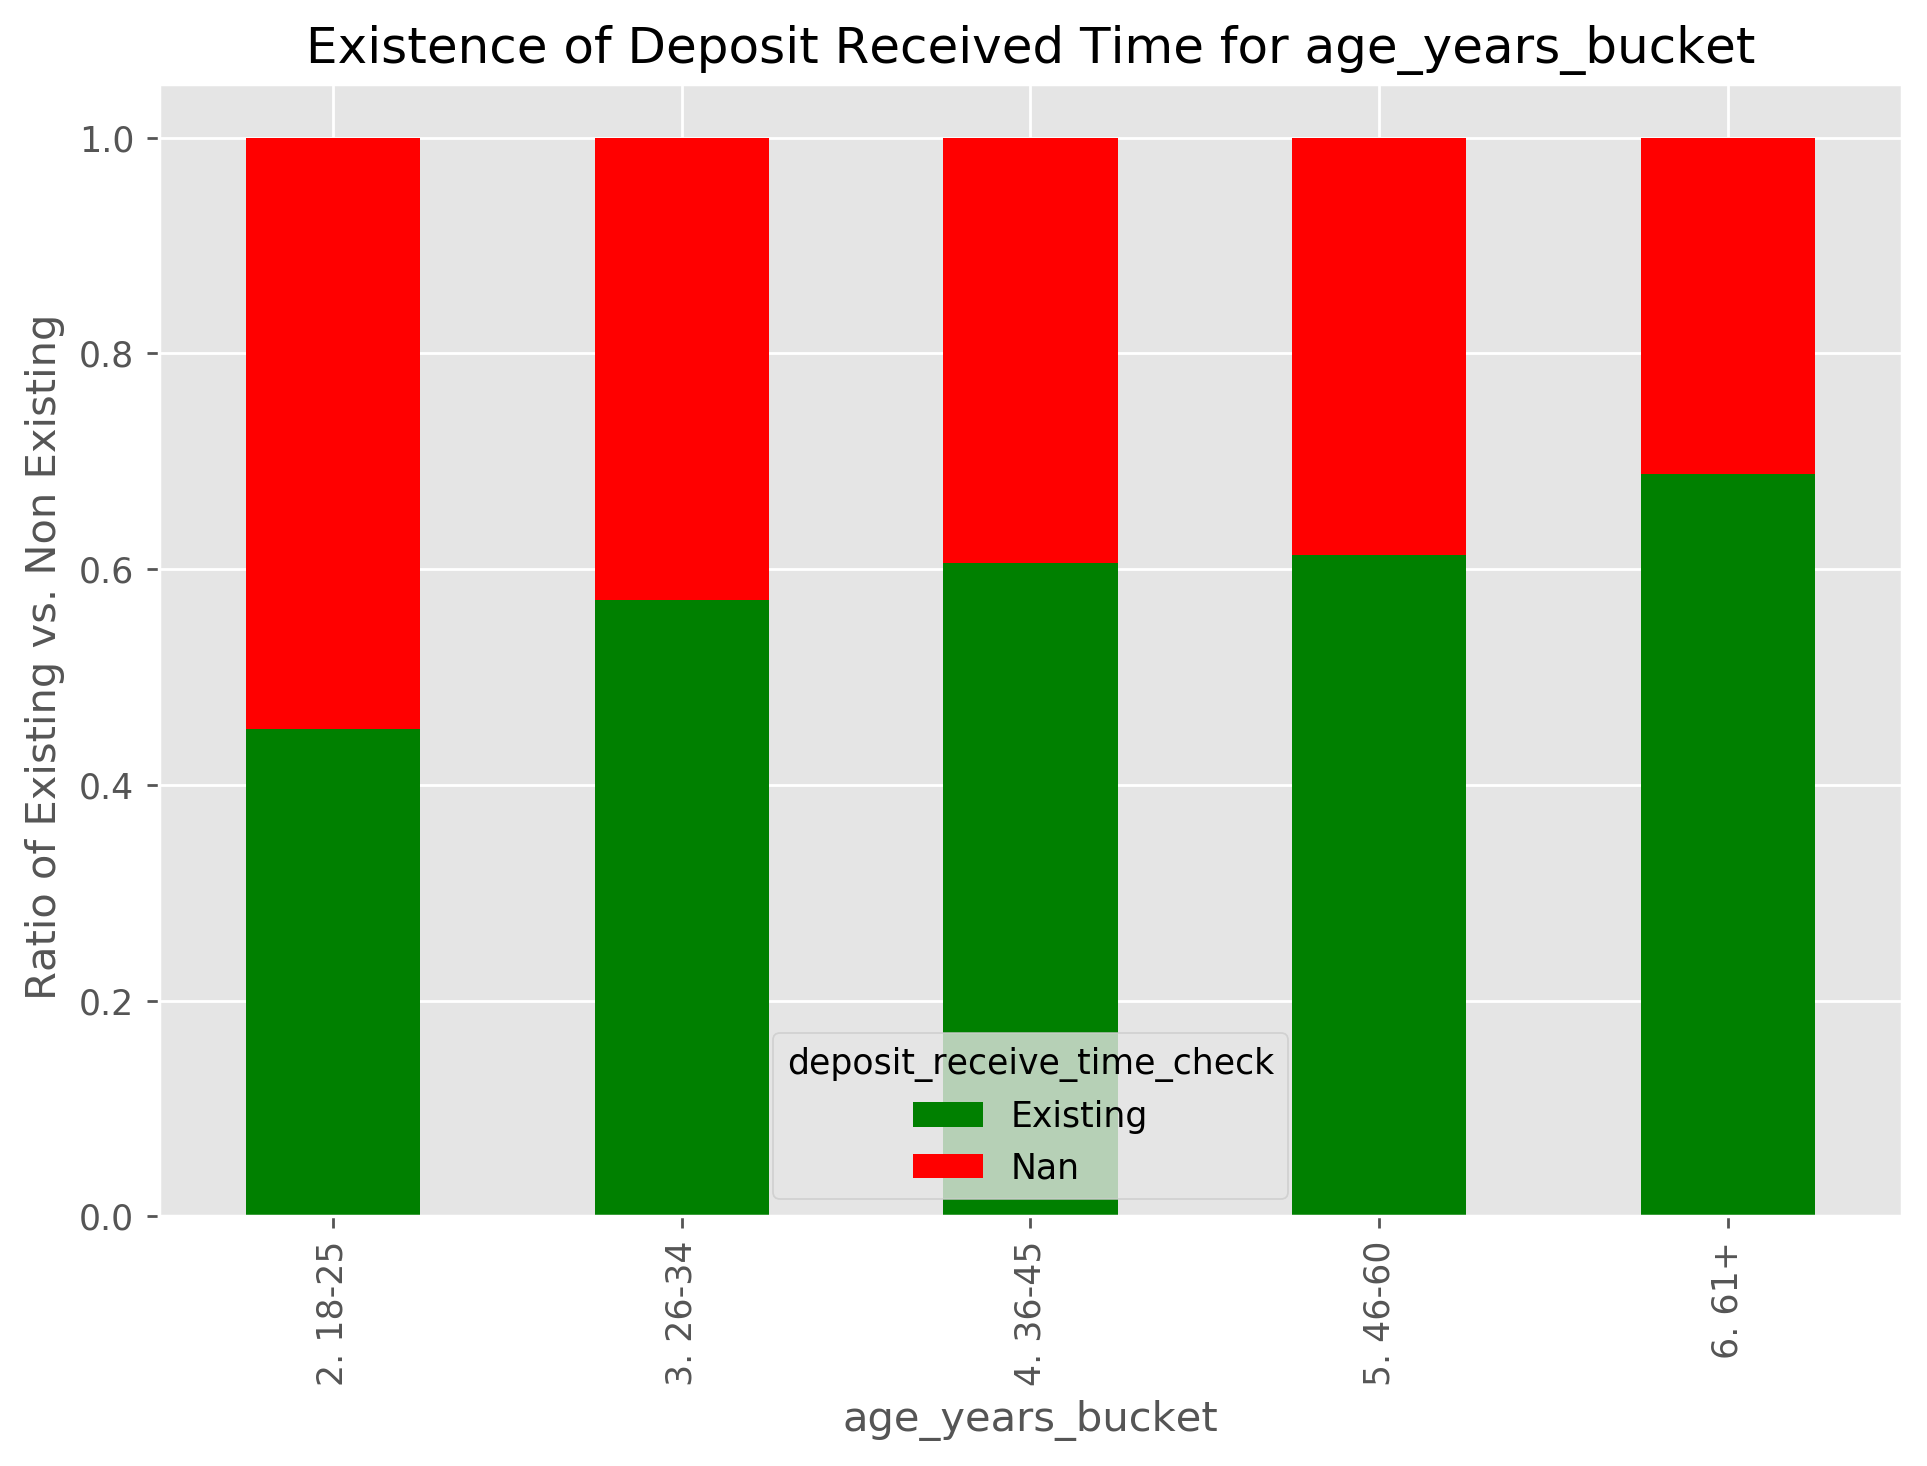

In [22]:
plot_2(dataset,"age_years_bucket")

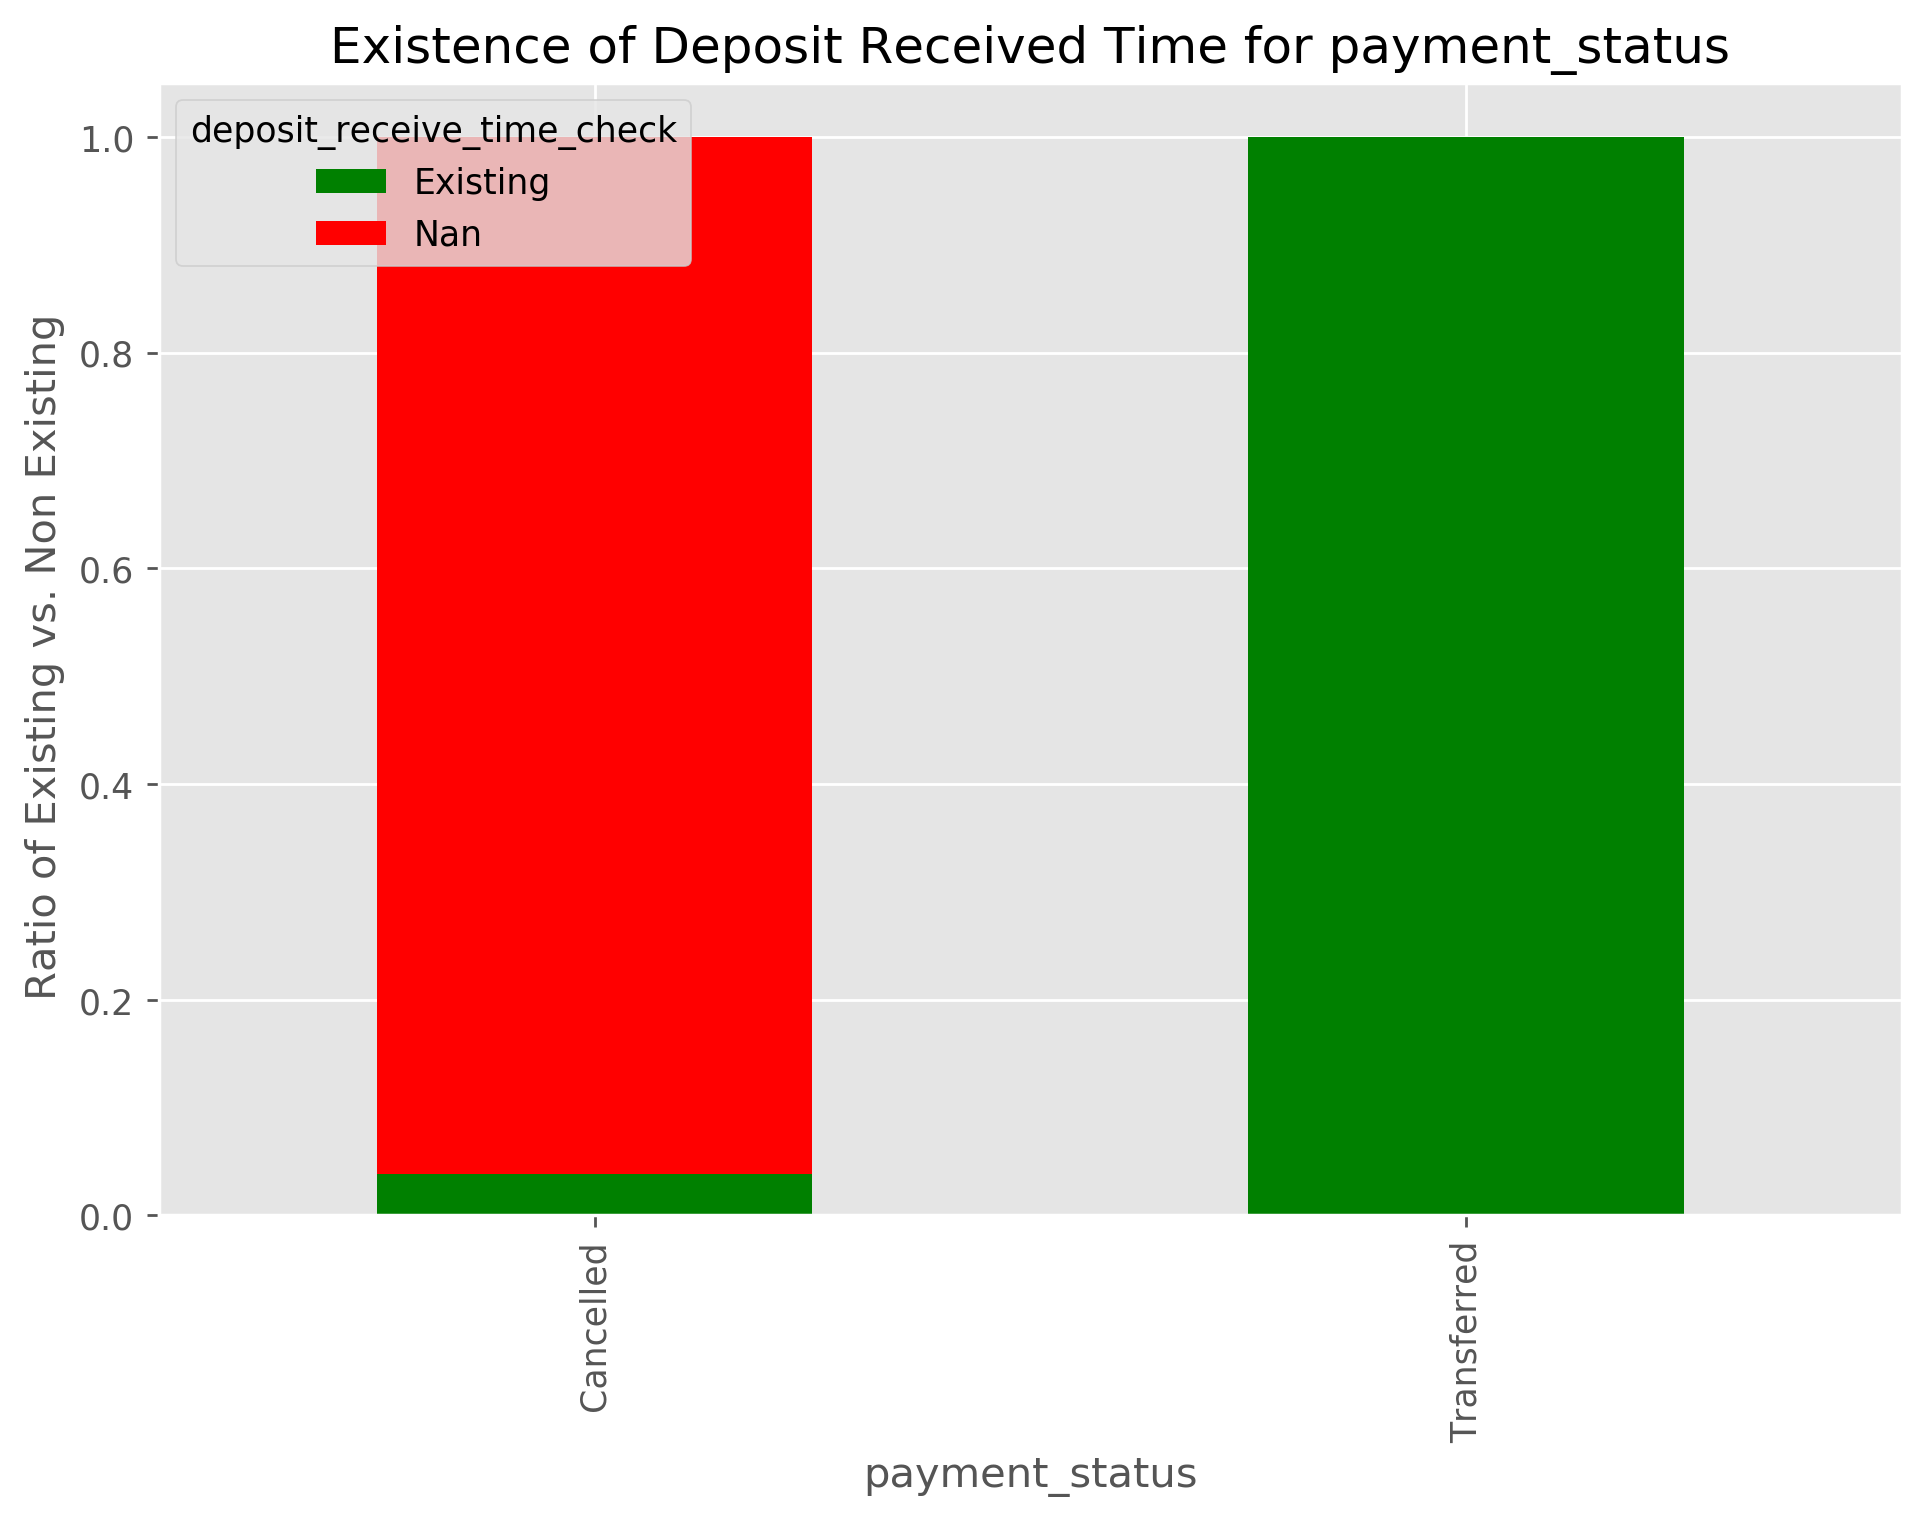

In [23]:
plot_2(dataset,"payment_status")

## -All the missing values of Deposit times belong to the "Cancelled" category of payment status, we cannot impute the deposit recevied time values with any value since the value is supposed to be absent intrinsically.## 

## -Since the transfer never completed and imputing with any other value of will necessarrily introudce false information in our dataset.##

In [24]:
dataset[(dataset.deposit_receive_time_check=="Nan") 
       & (dataset.payment_status == 'Cancelled')].describe(include='all')

,user_id_hashed,profile_type,user_create_date,user_language,age_years_bucket,user_country_code,transfer_submit_time,deposit_receive_time,transfer_amount_gbp,payment_status,payment_reference_classification,source_currency_code,target_currency_code,sum_of_this_user,deposit_receive_time_check,transfer_amount_gbp_check
count,30977,30977,30977,30977,30977,30977.0,30977,0,2.865600e+04,30977,30977,30977.0,30977.0,3.097700e+04,30977,30977
unique,13901,2,304,10,5,75.0,30953,0,NaN,1,25,18.0,41.0,NaN,1,2
top,886c375df1,Personal,2016-11-02 00:00:00,EN,3. 26-34,134.0,2016-11-04 16:44:46,NaN,NaN,Cancelled,blank,1.0,26.0,NaN,Nan,Existing
freq,99,30125,327,25077,17624,16258.0,2,NaN,NaN,30977,20452,9259.0,15175.0,NaN,30977,28656
first,NaN,NaN,2016-01-01 00:00:00,NaN,NaN,NaN,2016-01-01 01:55:09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,2016-12-31 00:00:00,NaN,NaN,NaN,2017-03-12 22:28:18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.179828e+03,NaN,NaN,NaN,NaN,5.835987e+04,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.565301e+04,NaN,NaN,NaN,NaN,6.145930e+05,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.680000e+02,NaN,NaN,NaN,NaN,5.430000e+02,NaN,NaN


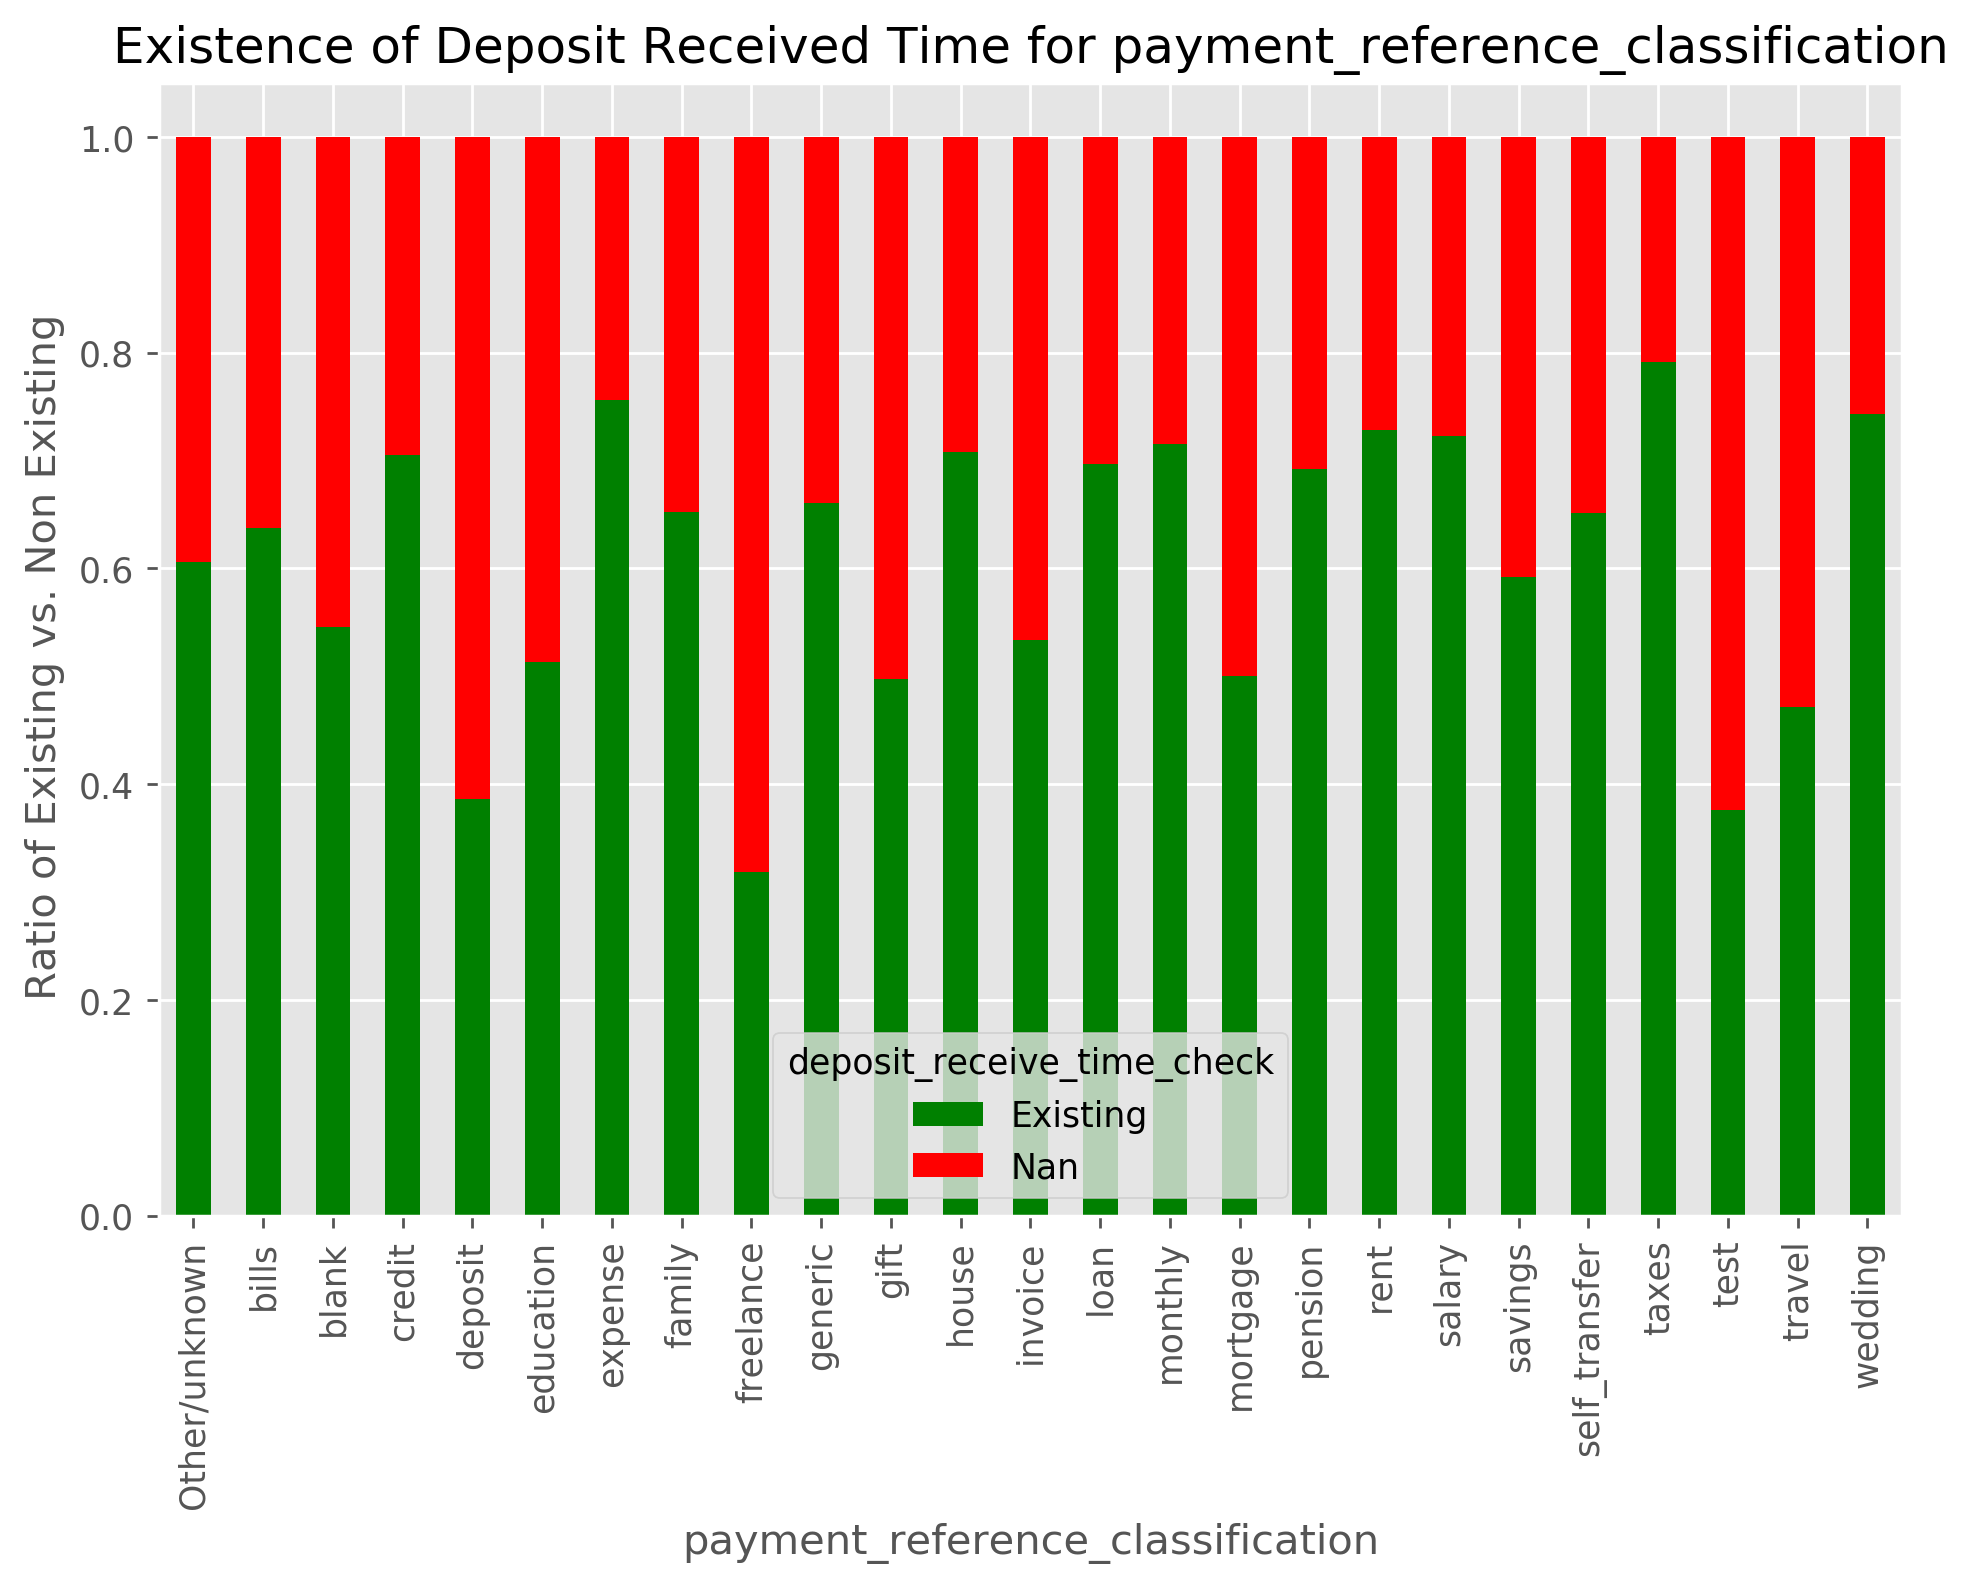

In [25]:
plot_2(dataset,"payment_reference_classification")


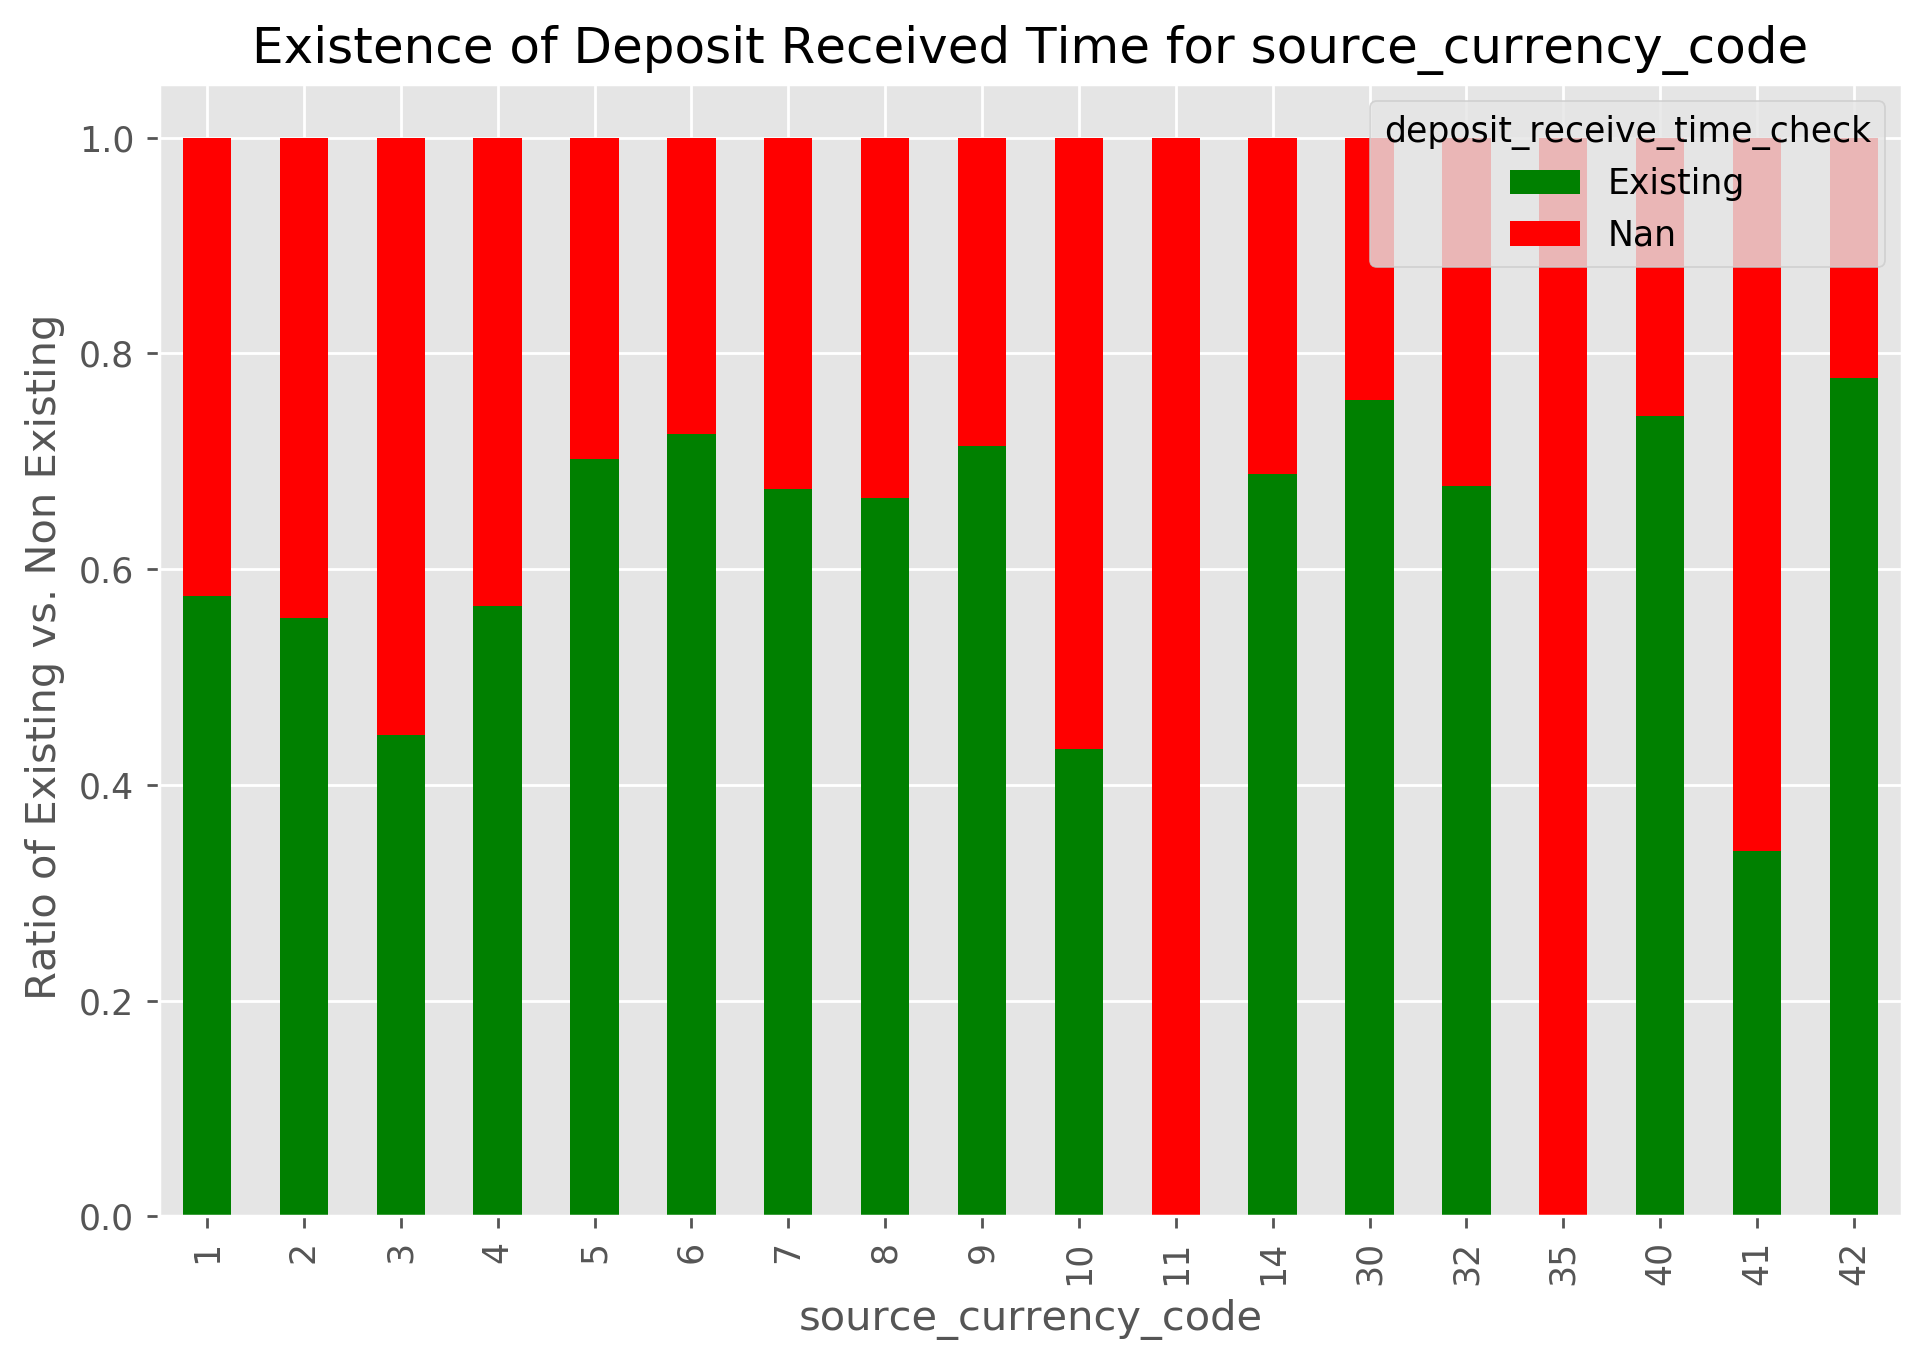

In [26]:
plot_2(dataset,"source_currency_code")


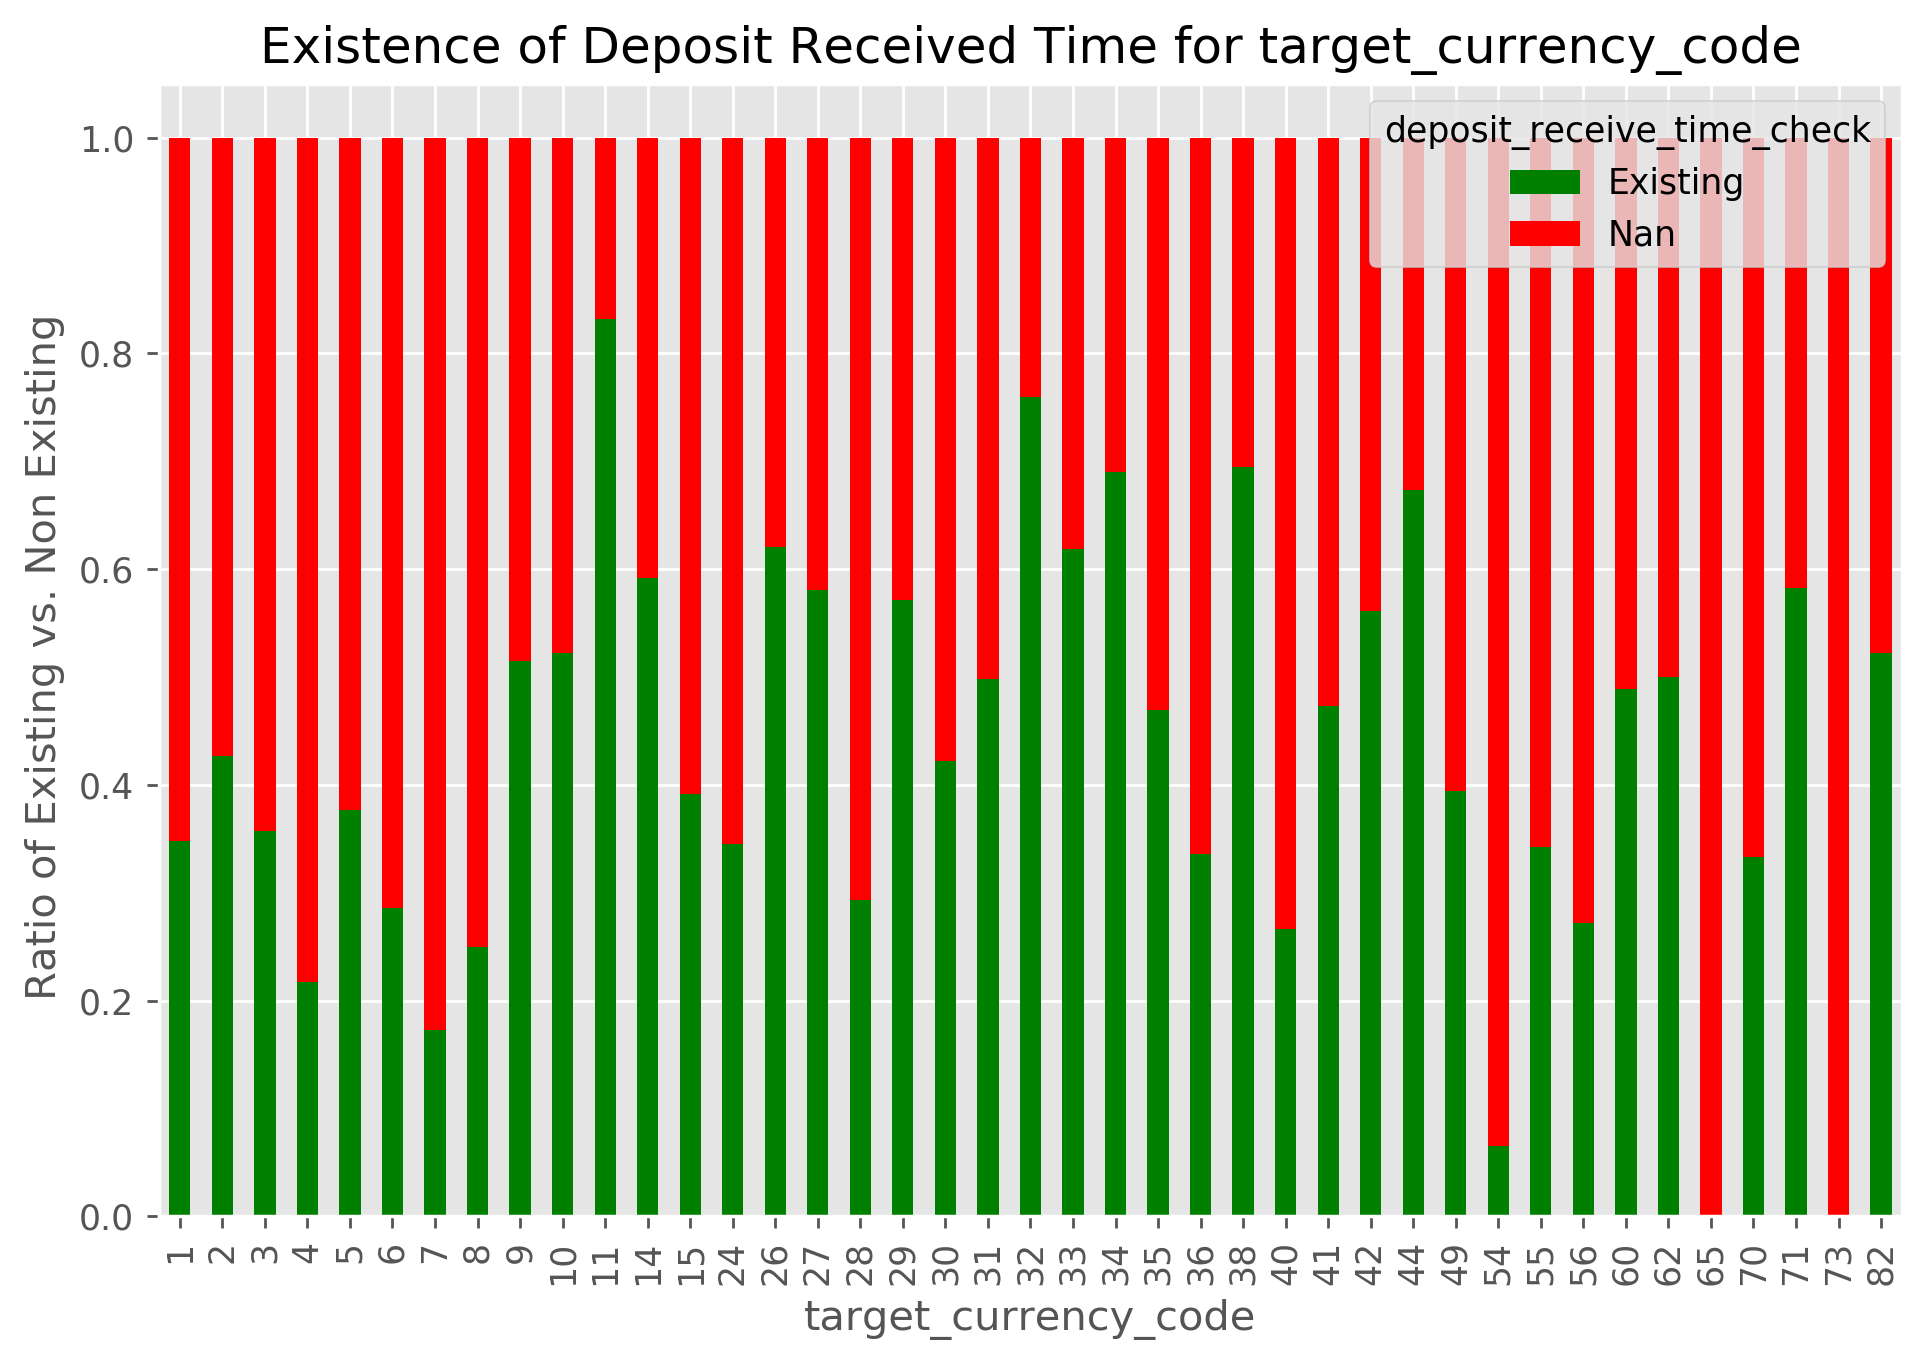

In [27]:
plot_2(dataset,"target_currency_code")

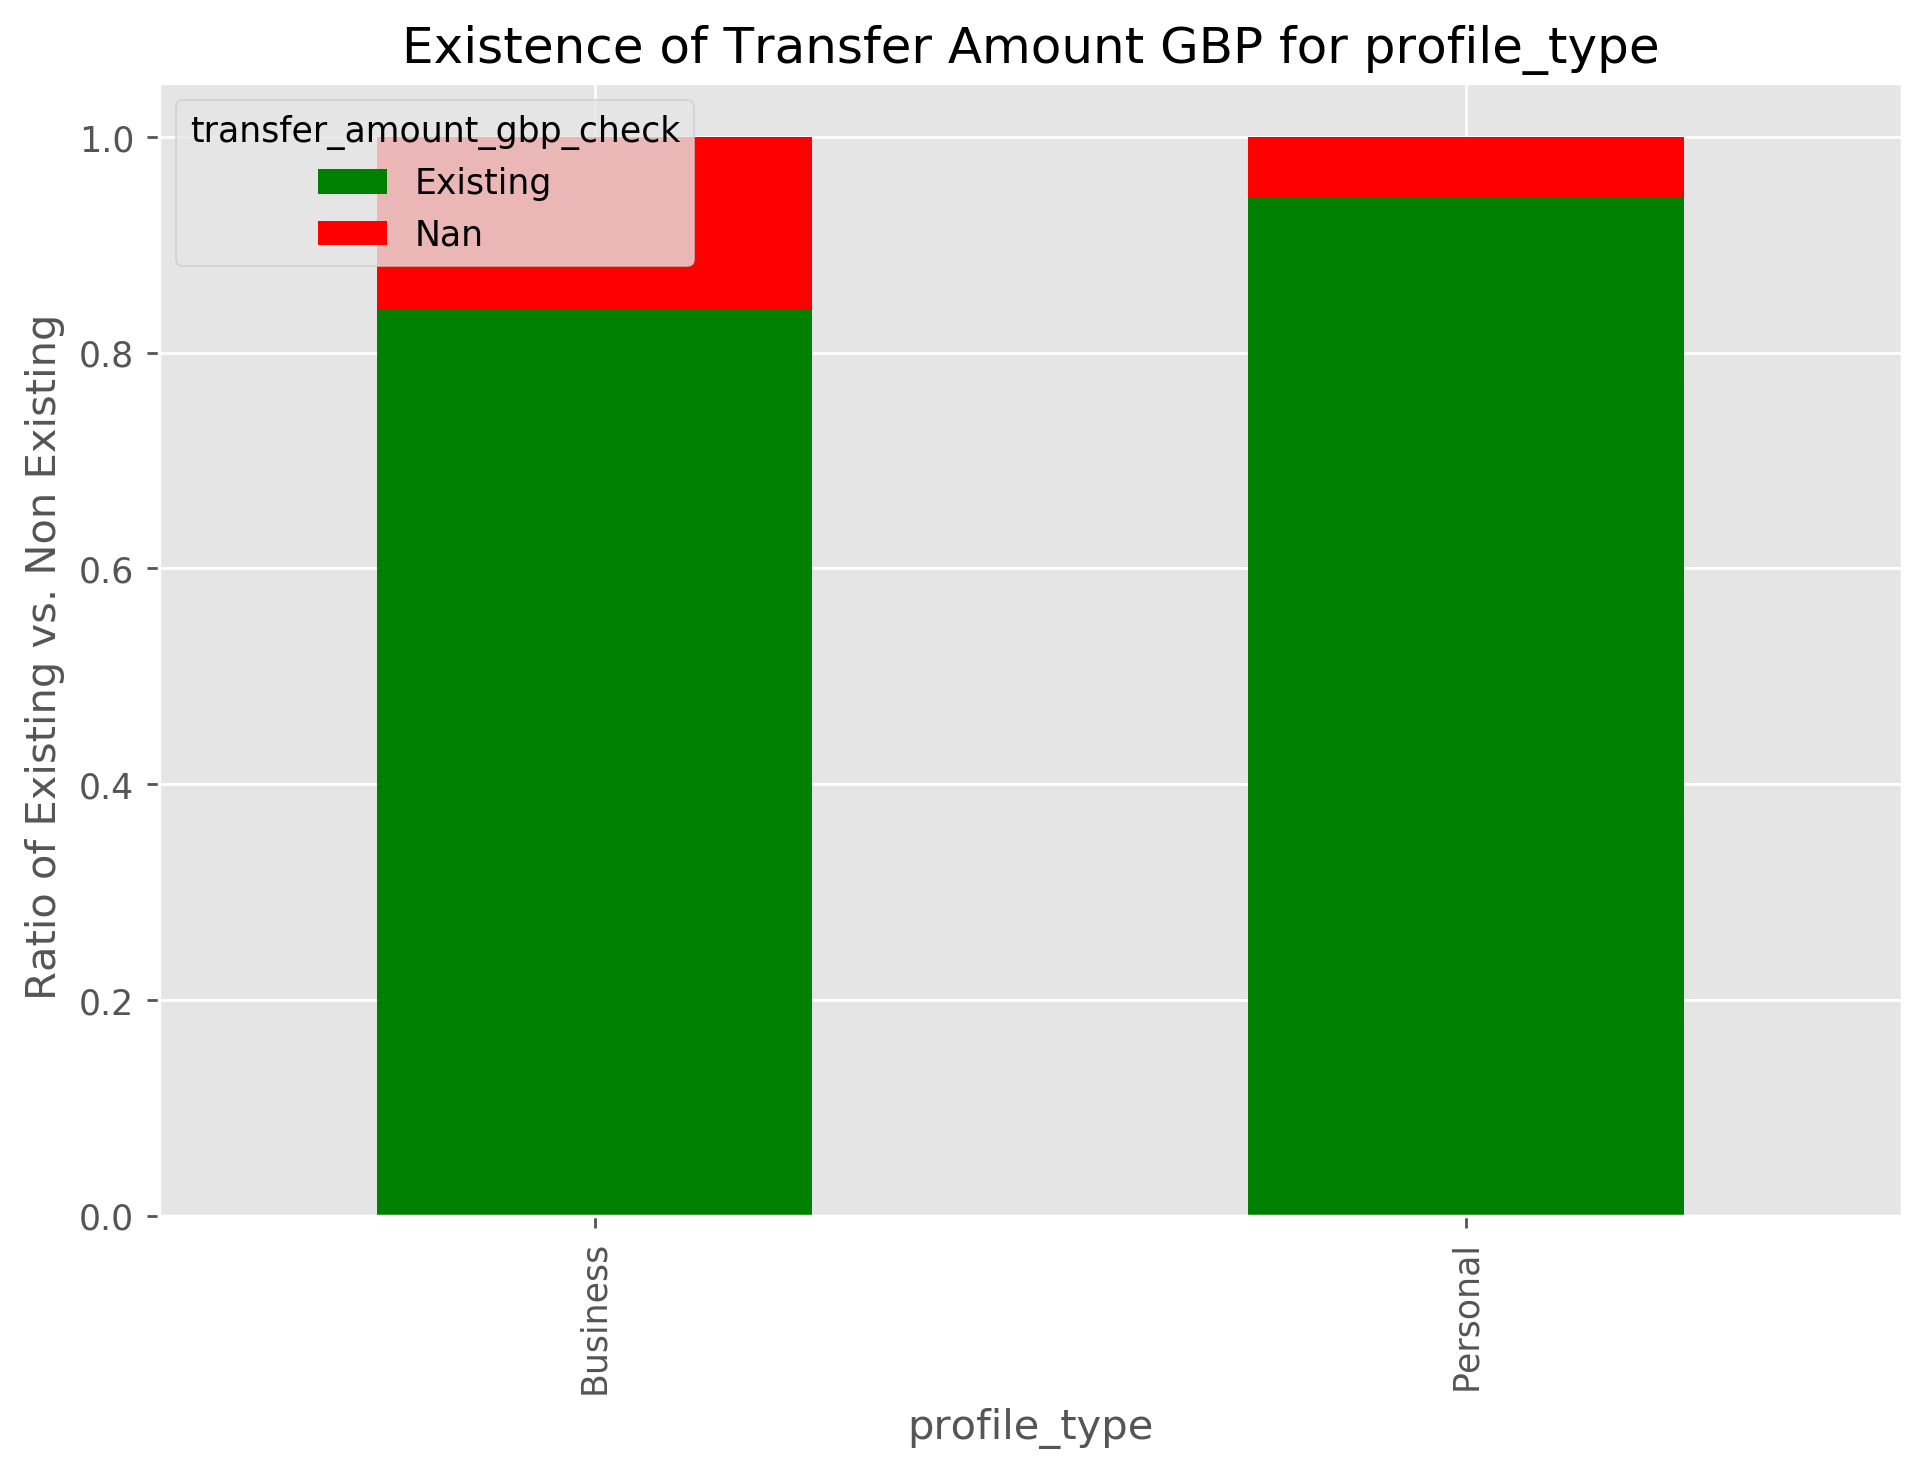

In [28]:
plot_1(dataset,"profile_type")

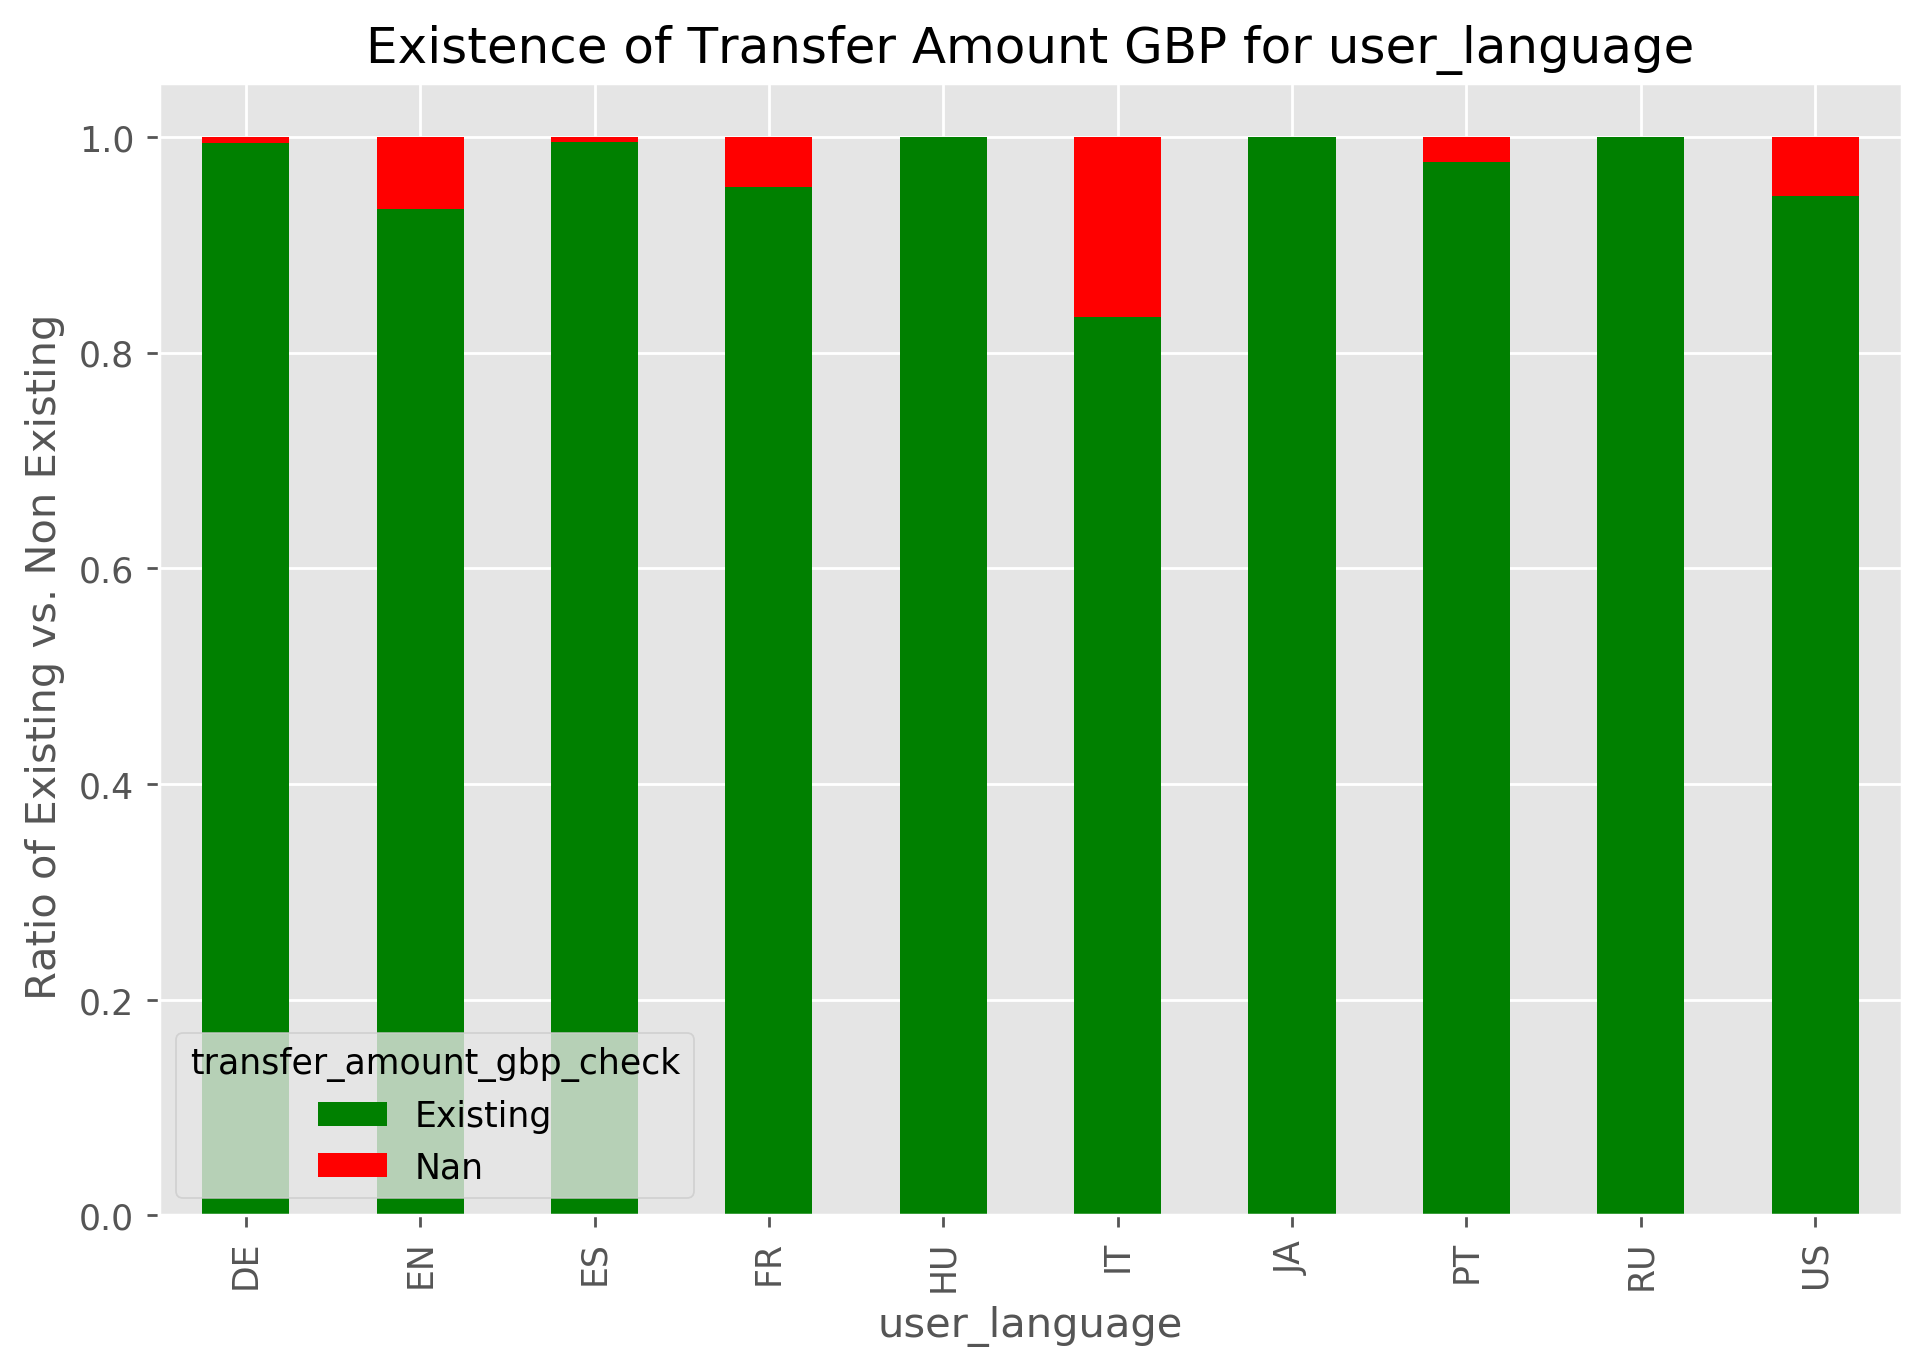

In [29]:
plot_1(dataset,"user_language")

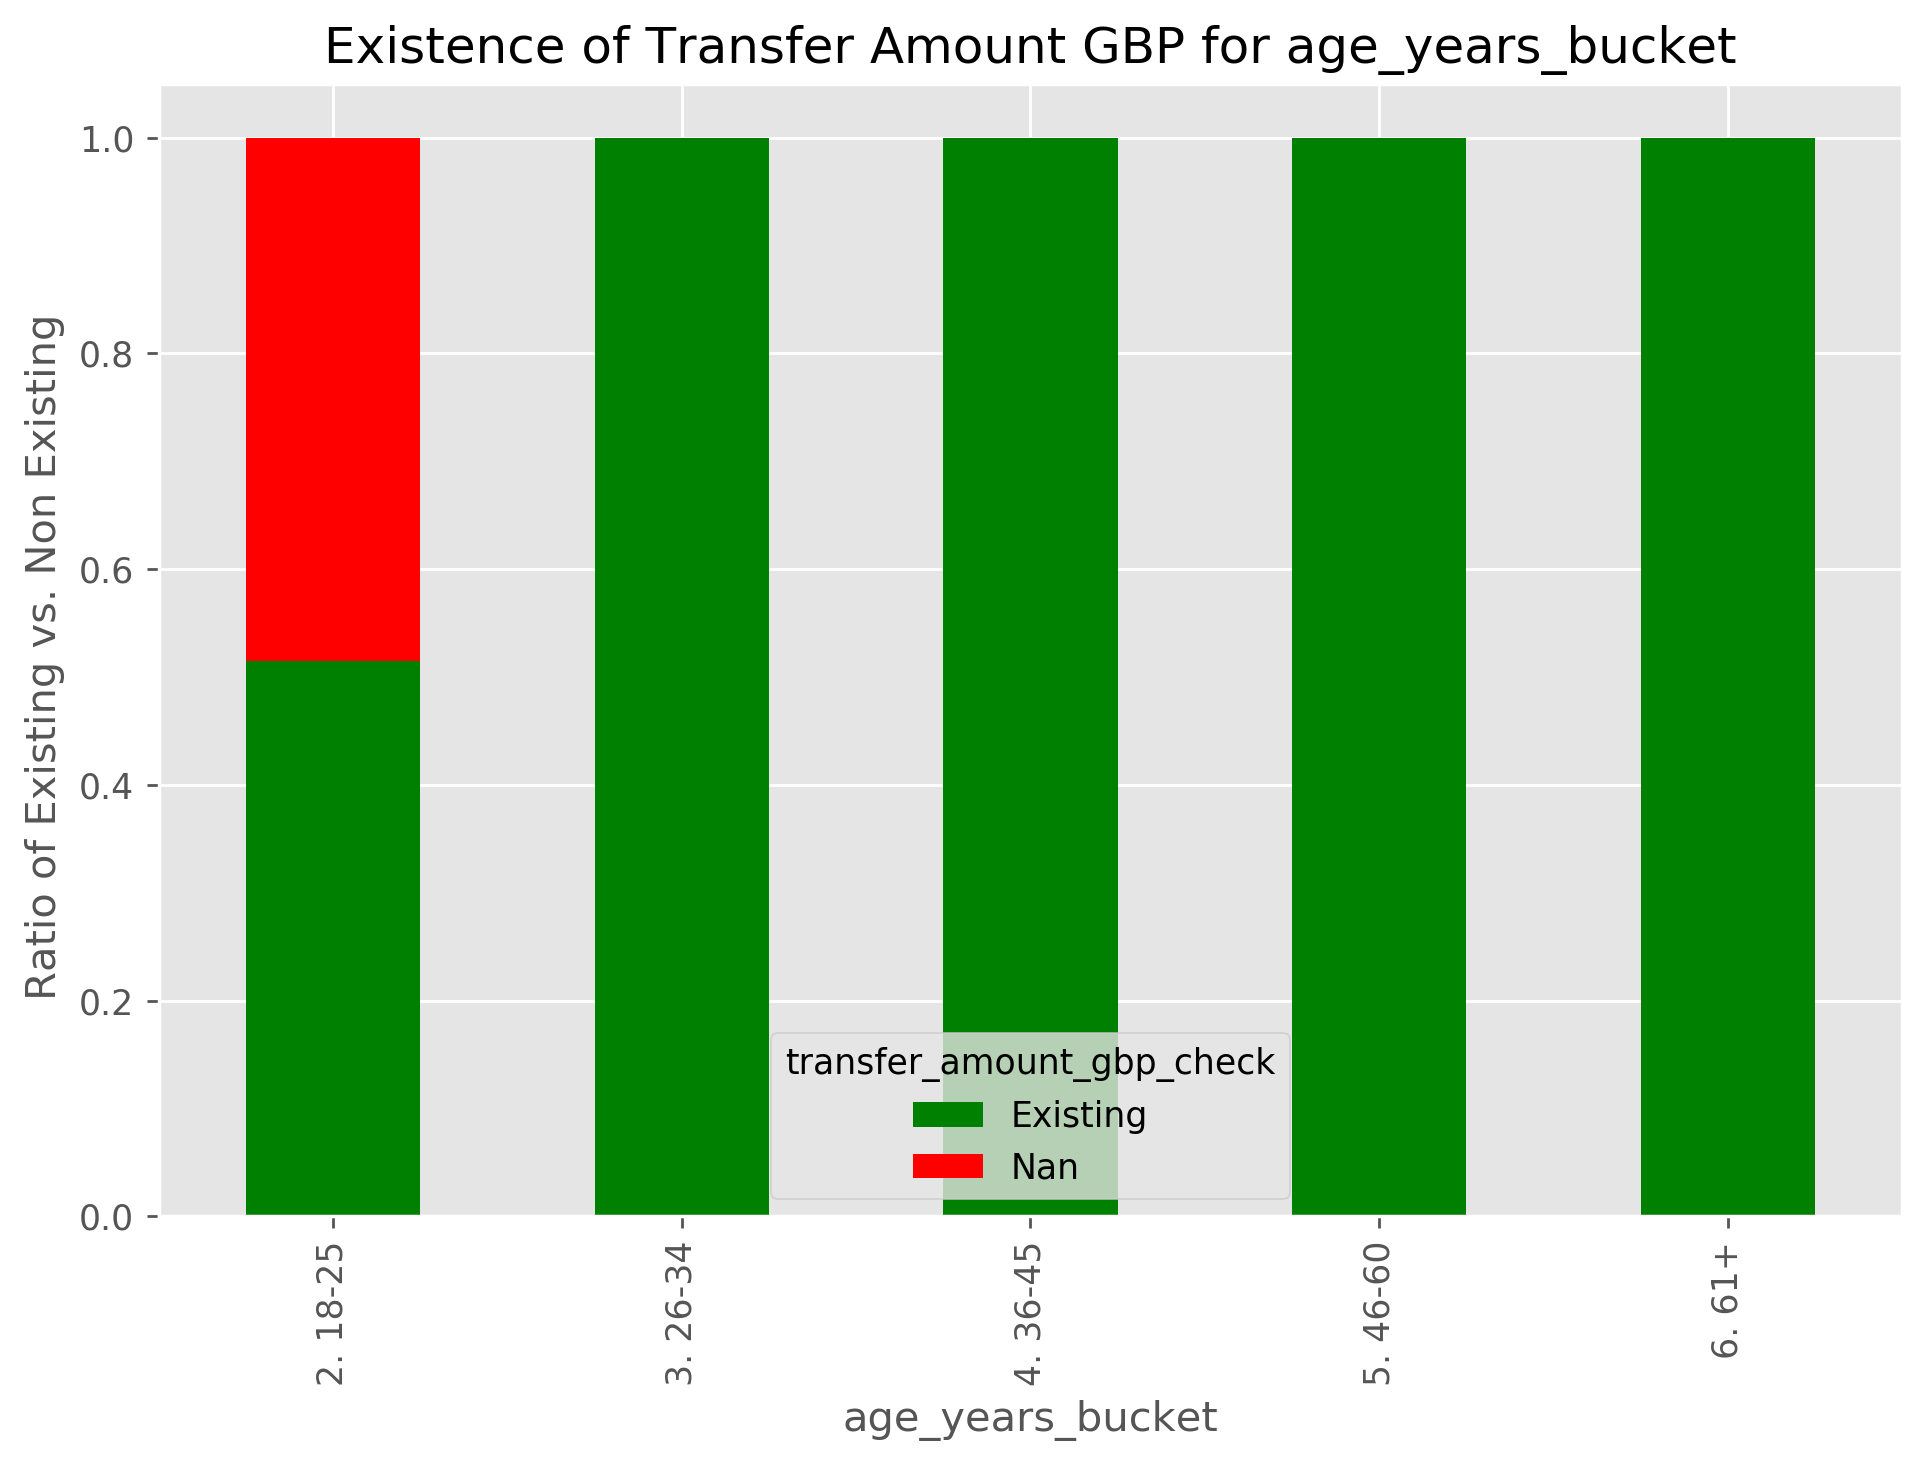

In [30]:
plot_1(dataset,"age_years_bucket")

In [31]:
dataset[(dataset.age_years_bucket == "2. 18-25") & \
        (dataset.transfer_amount_gbp_check=="Nan")].describe(include='all') 

,user_id_hashed,profile_type,user_create_date,user_language,age_years_bucket,user_country_code,transfer_submit_time,deposit_receive_time,transfer_amount_gbp,payment_status,payment_reference_classification,source_currency_code,target_currency_code,sum_of_this_user,deposit_receive_time_check,transfer_amount_gbp_check
count,4239,4239,4239,4239,4239,4239.0,4239,1918,0.0,4239,4239,4239.0,4239.0,4239.0,4239,4239
unique,1570,2,302,7,1,1.0,4239,1908,NaN,2,22,17.0,34.0,NaN,2,1
top,5bc078ba04,Personal,2016-02-26 00:00:00,EN,2. 18-25,134.0,2016-10-09 15:53:02,2016-05-13 11:37:05,NaN,Cancelled,blank,1.0,26.0,NaN,Nan,Nan
freq,68,4065,73,3790,4239,4239.0,1,2,NaN,2418,2810,1459.0,3811.0,NaN,2321,4239
first,NaN,NaN,2016-01-01 00:00:00,NaN,NaN,NaN,2016-01-01 17:11:05,2016-01-02 14:11:43,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,2016-12-31 00:00:00,NaN,NaN,NaN,2017-03-11 20:54:10,2017-03-11 20:55:20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN


**All the transfer amount values are attributed to the age bucket of "2. 18-25". Further more as can be seen from the above results there is only 1 unique value of country code in this subset of age bucket and missing transfer amount values. This country code value is 134. Hence we can successfult conclude users with country code of 134 and age bucket of "2. 18-25" are the source of this problem**

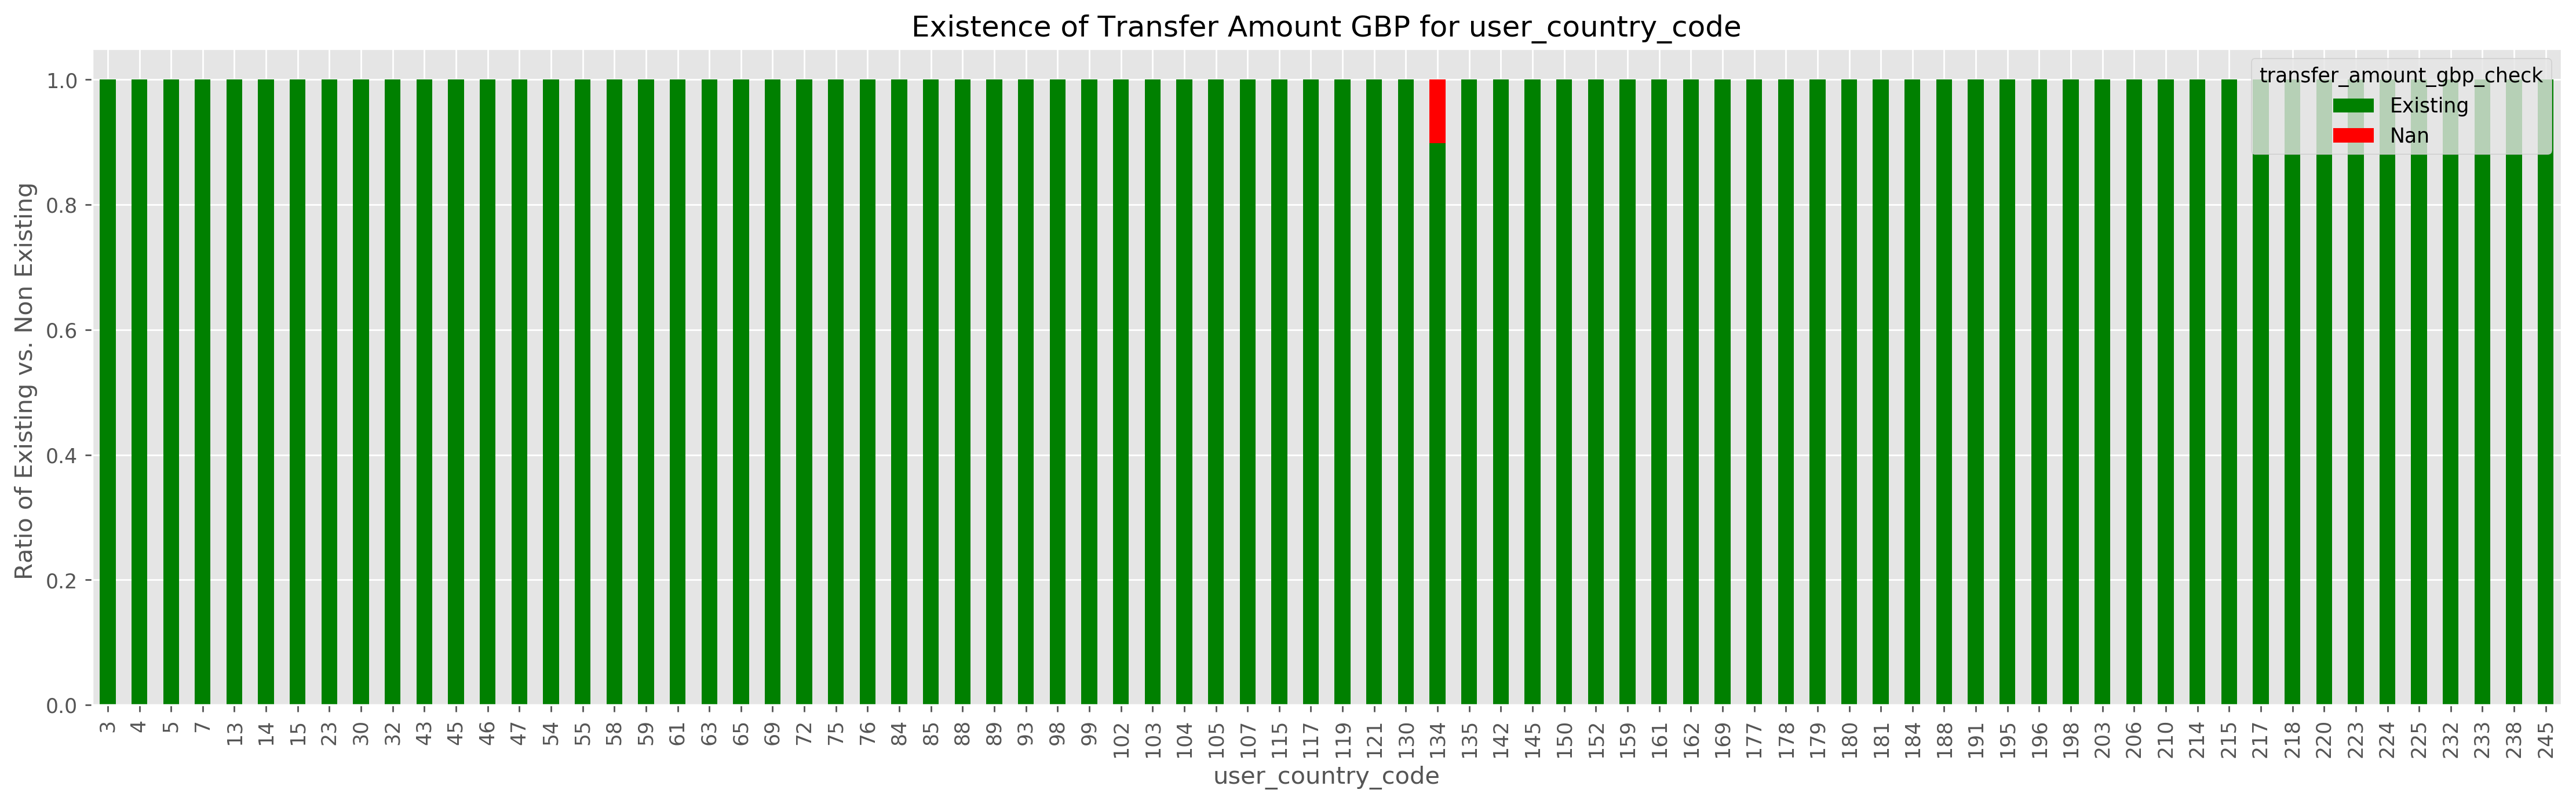

In [32]:
plot_1(dataset,"user_country_code",x_size=22)

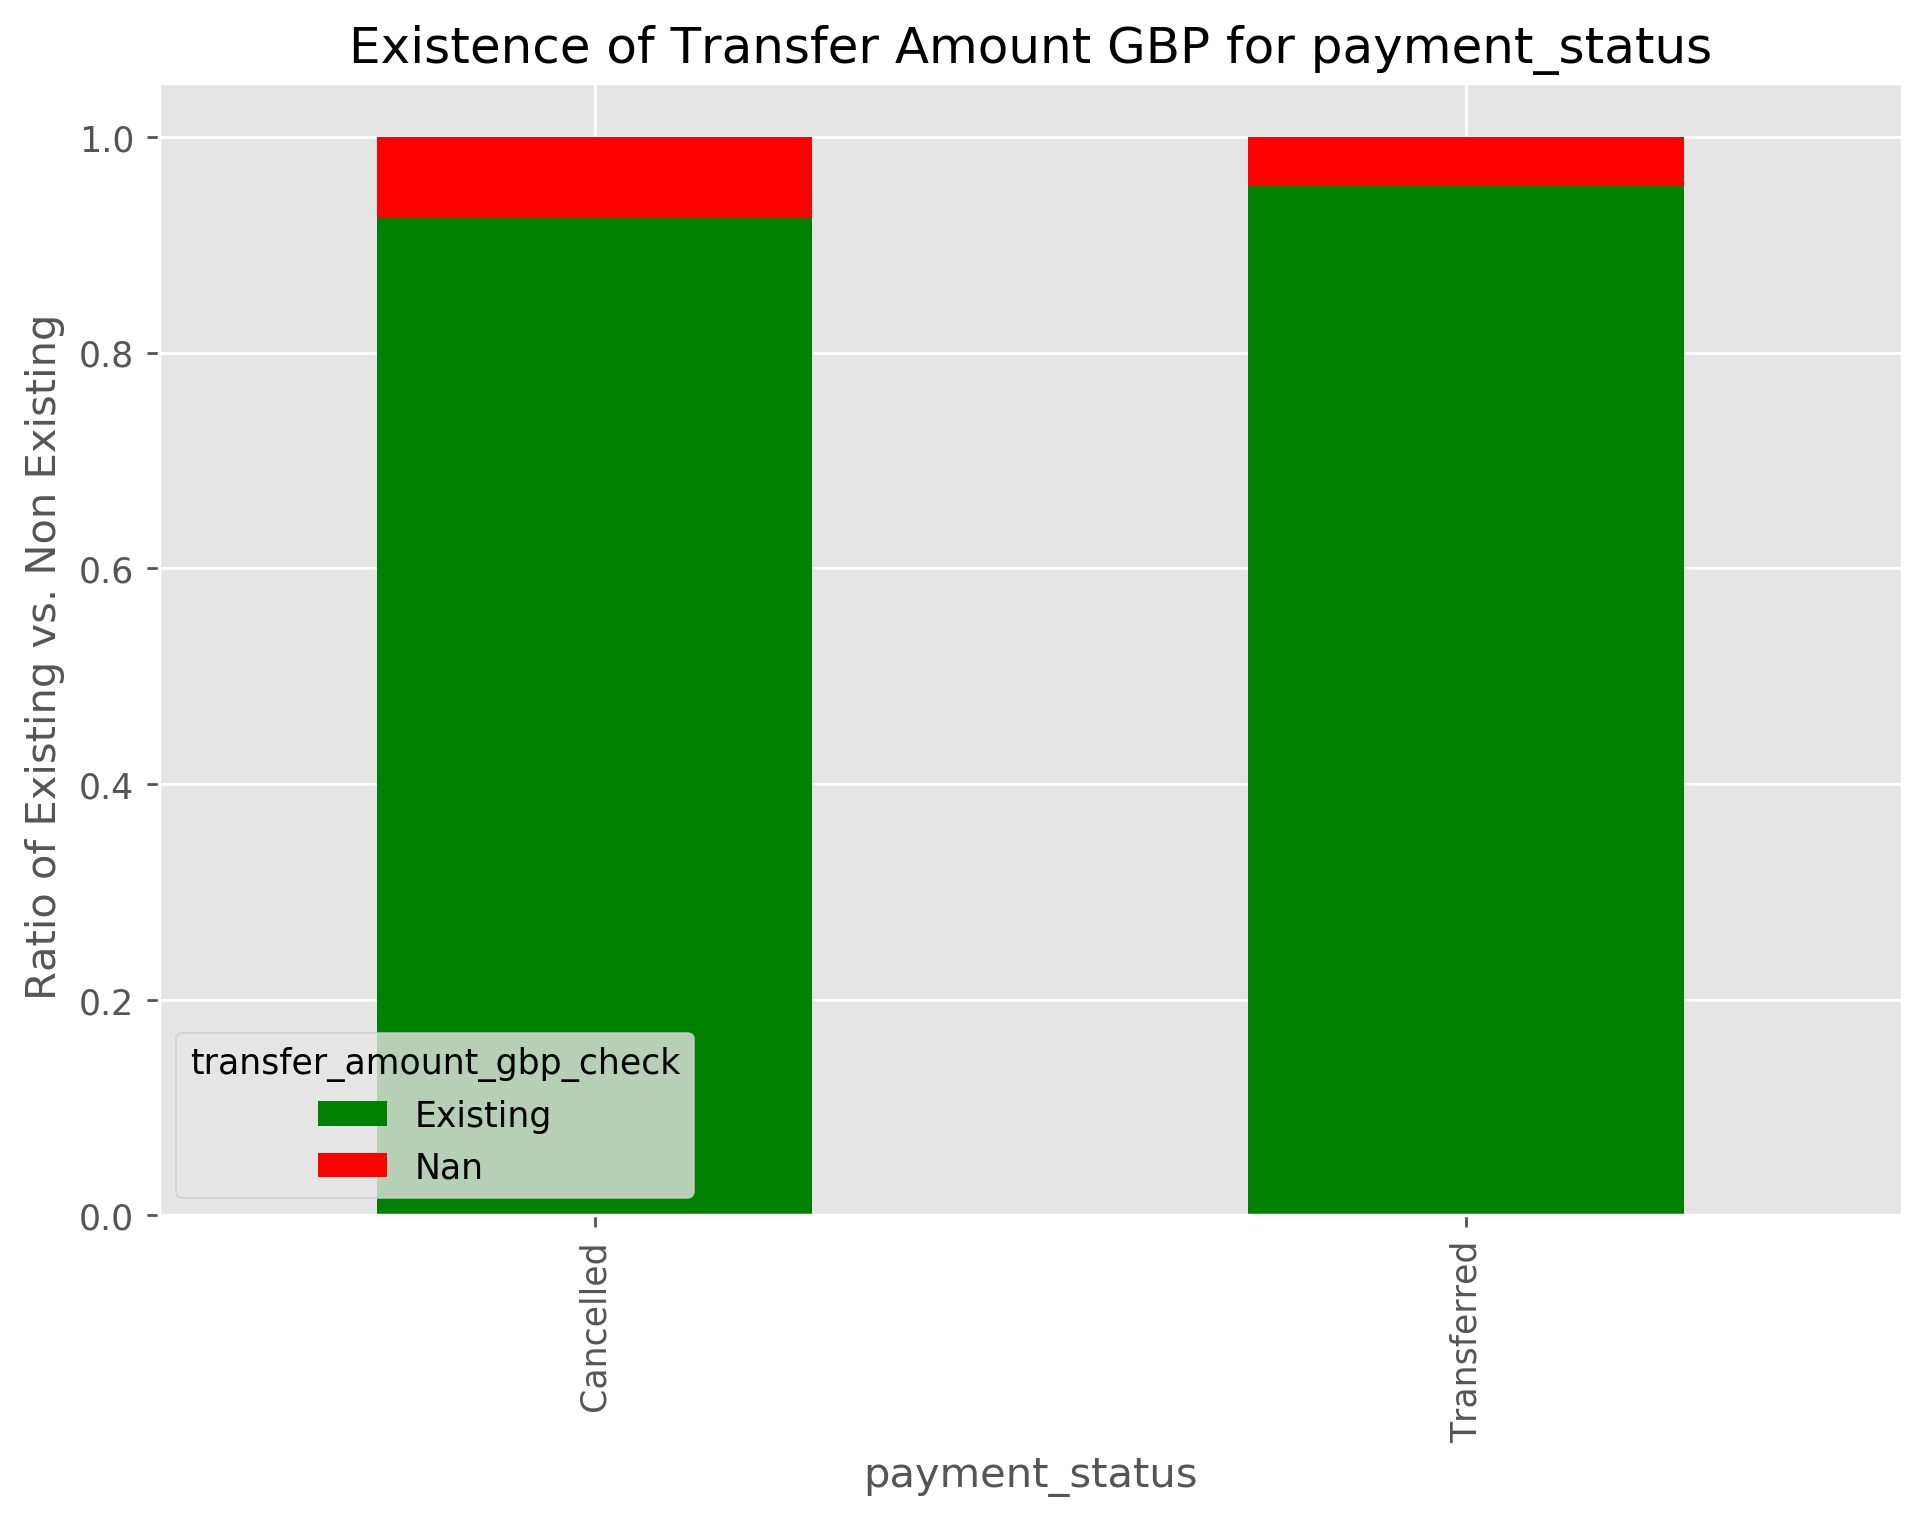

In [33]:
plot_1(dataset,"payment_status")

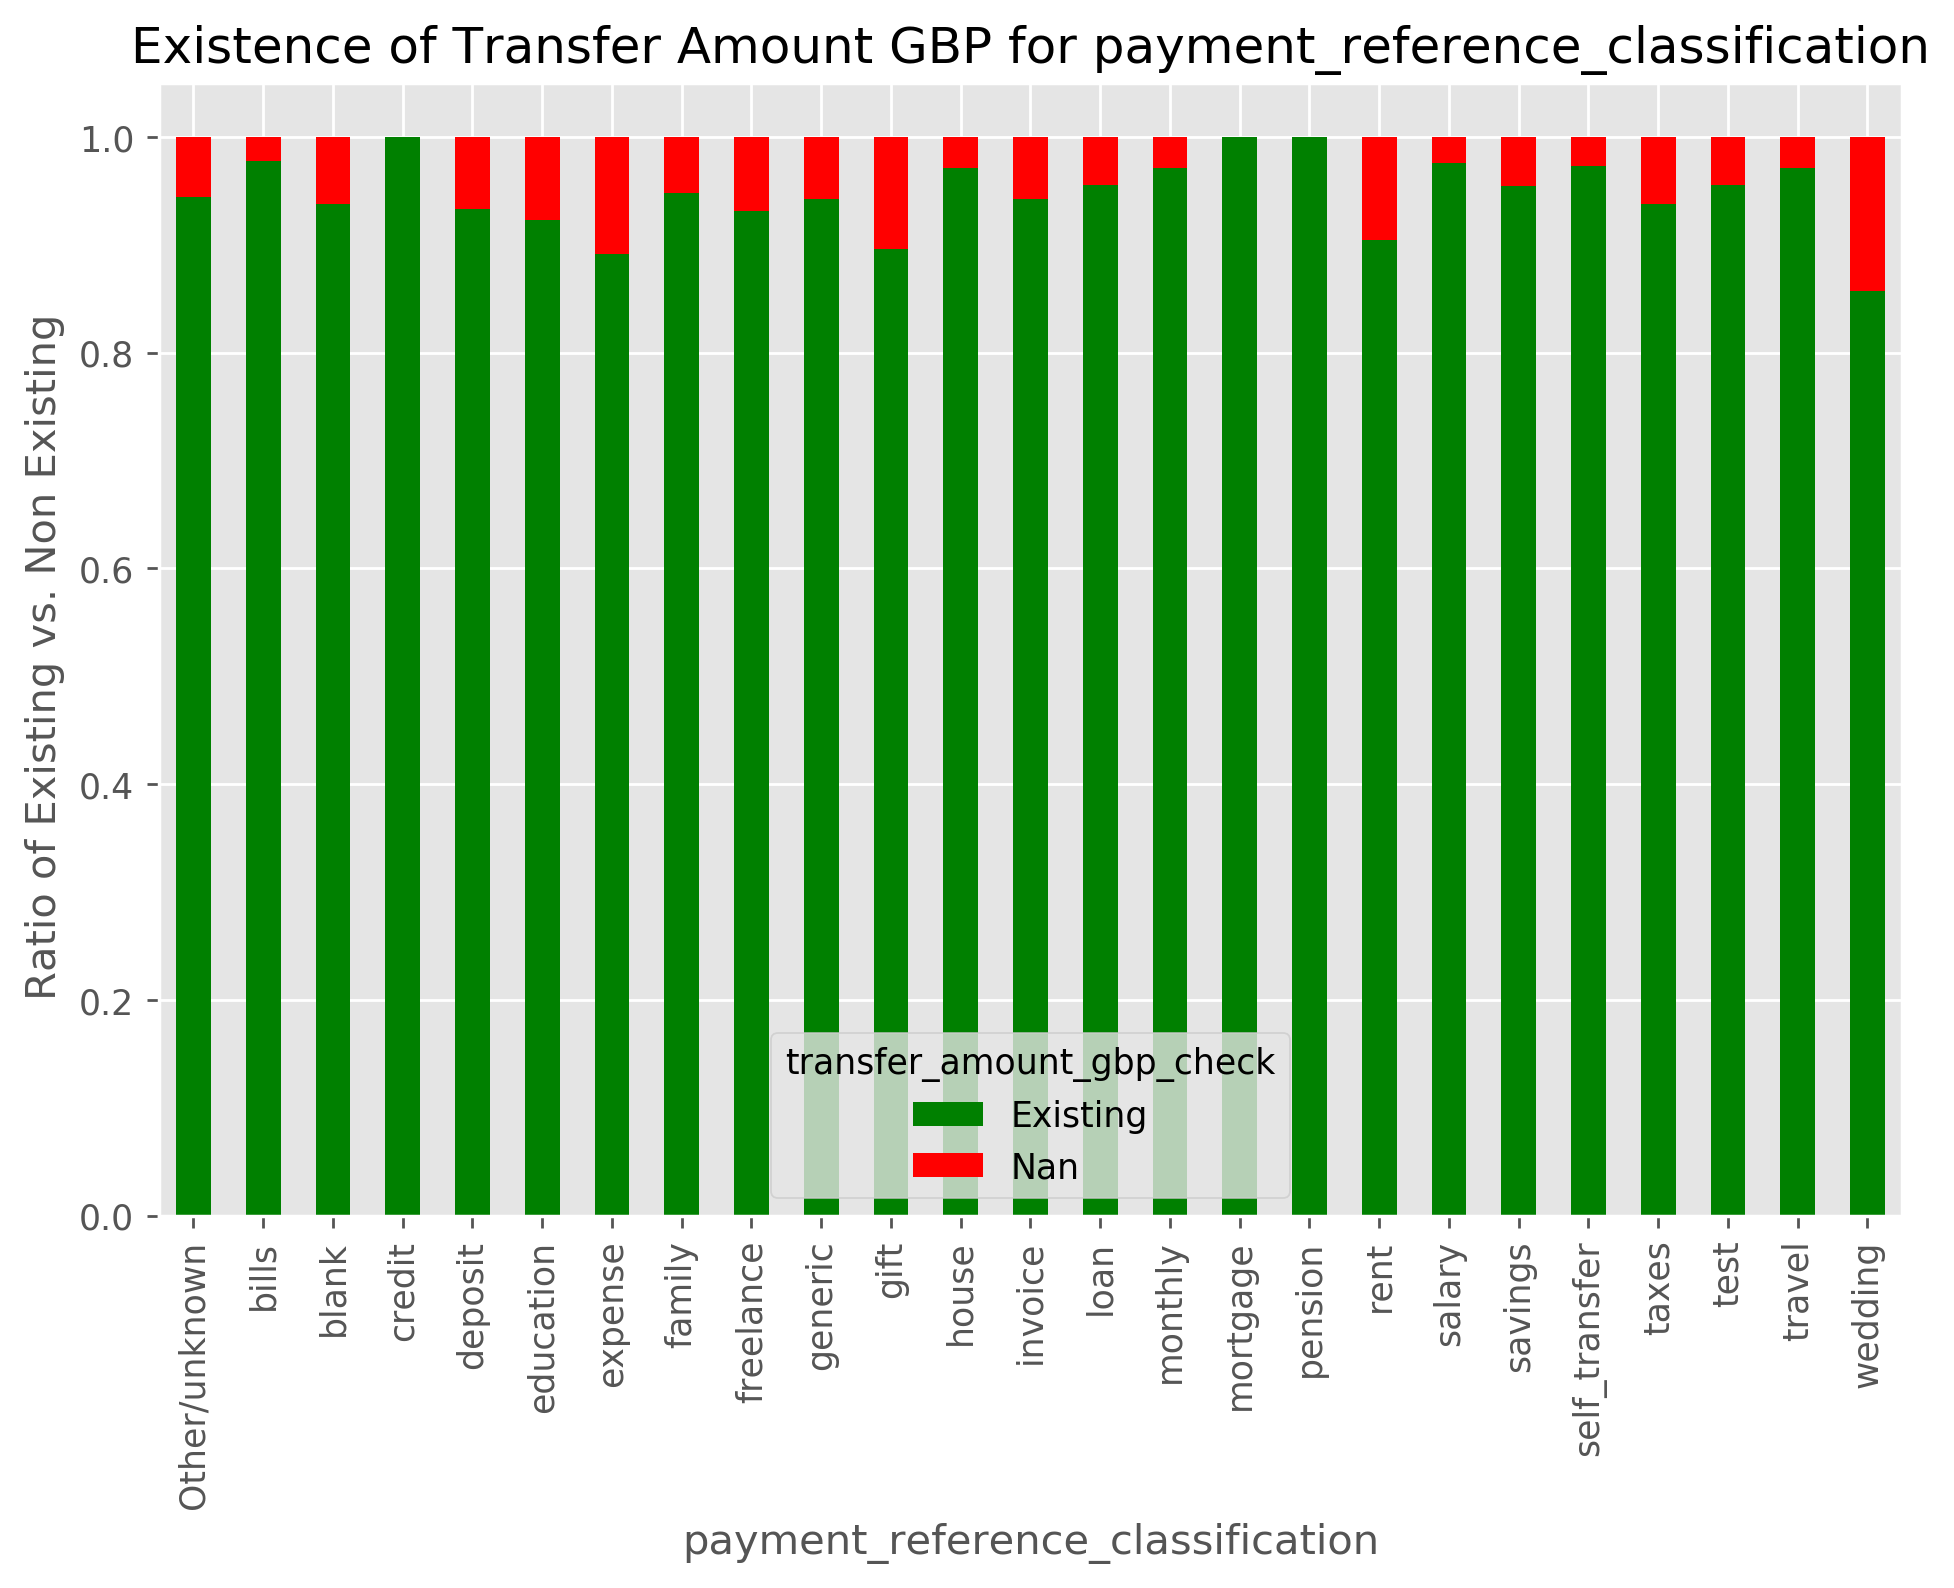

In [34]:
plot_1(dataset,"payment_reference_classification")

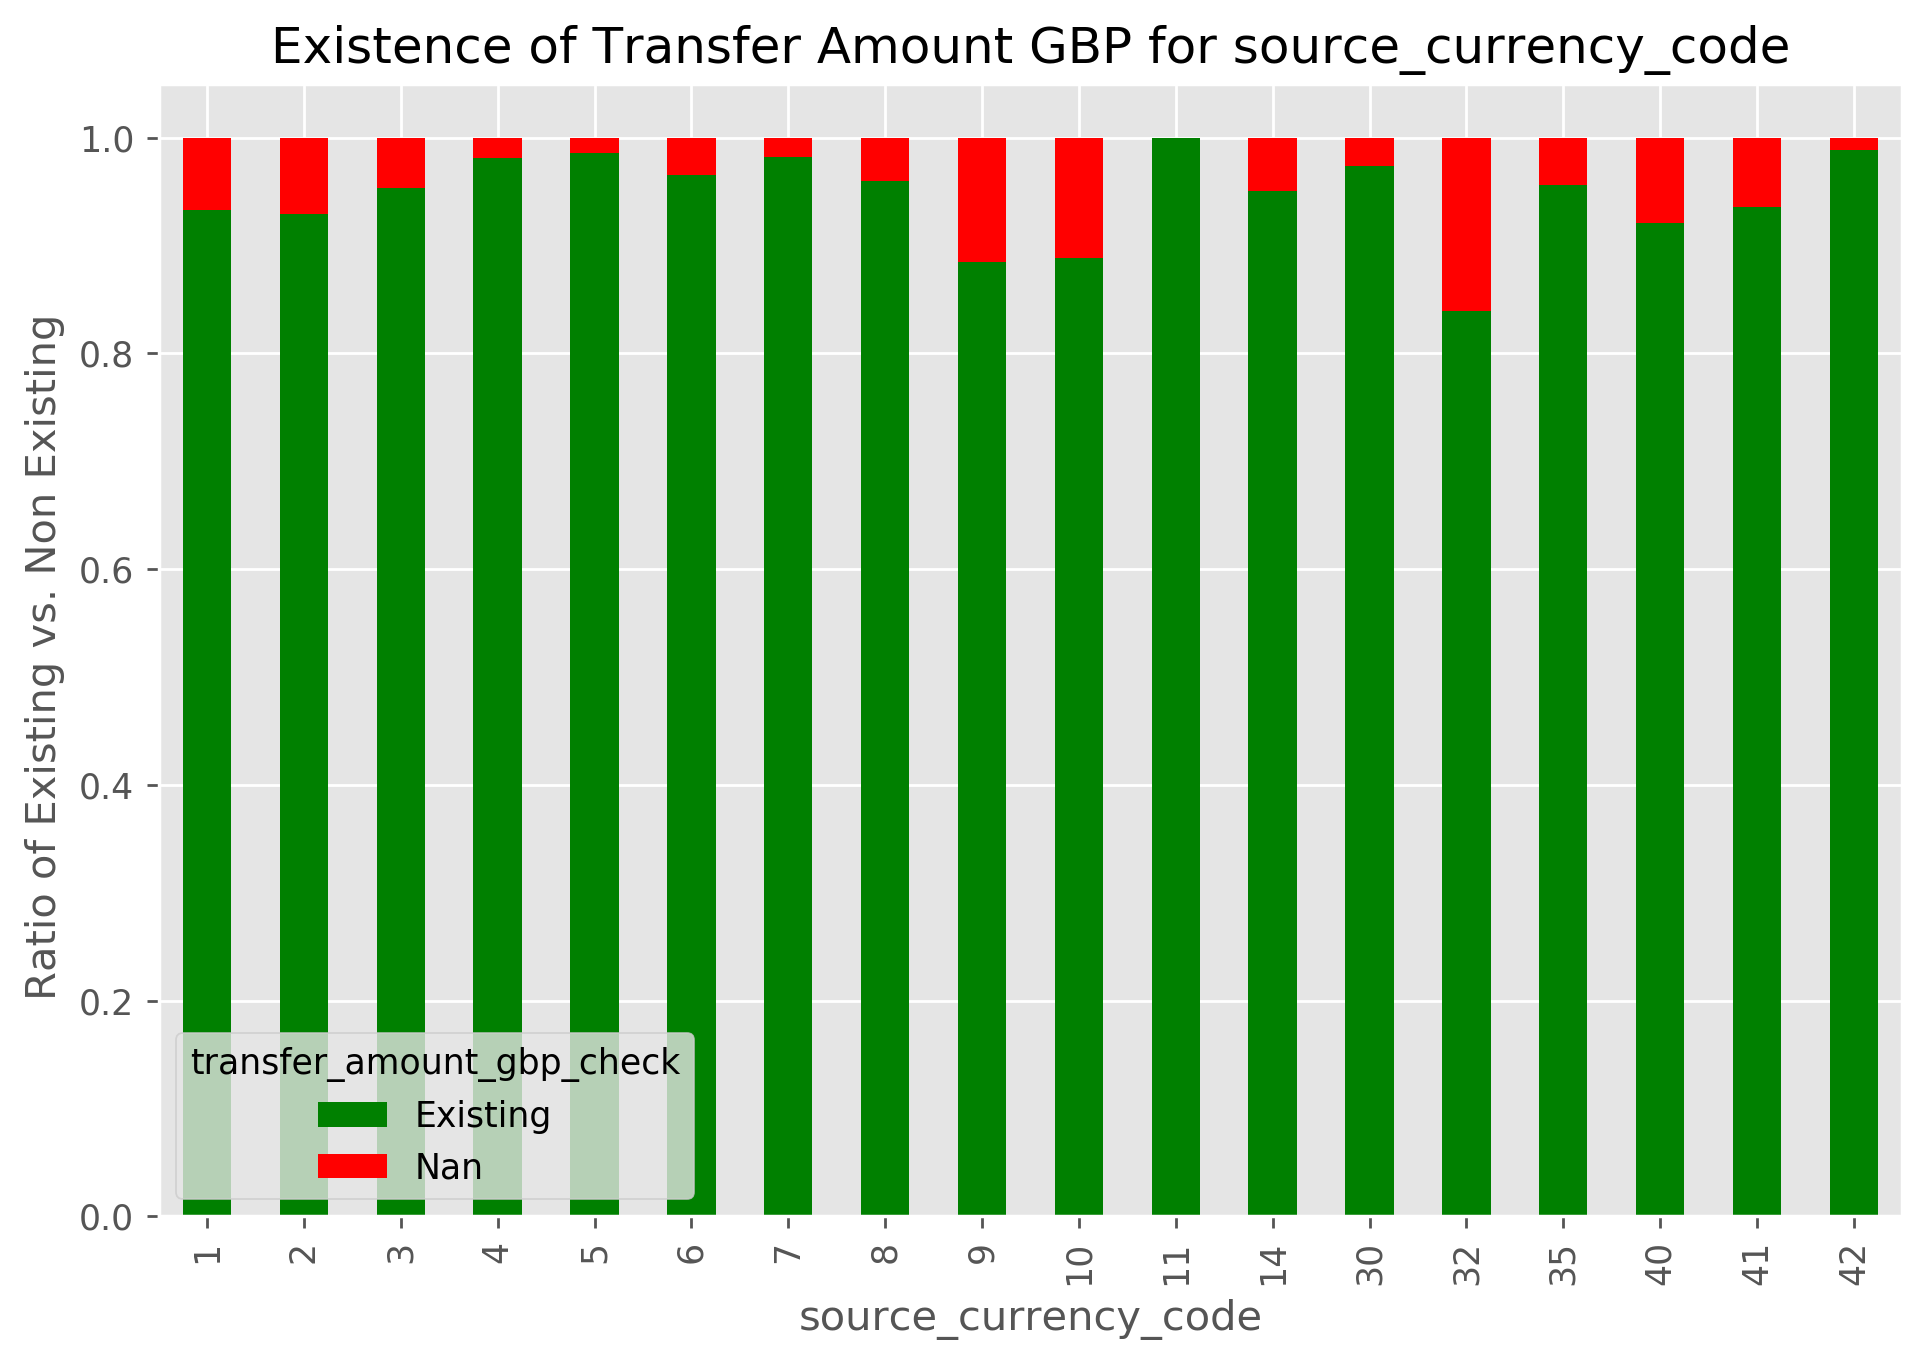

In [35]:
plot_1(dataset,"source_currency_code")

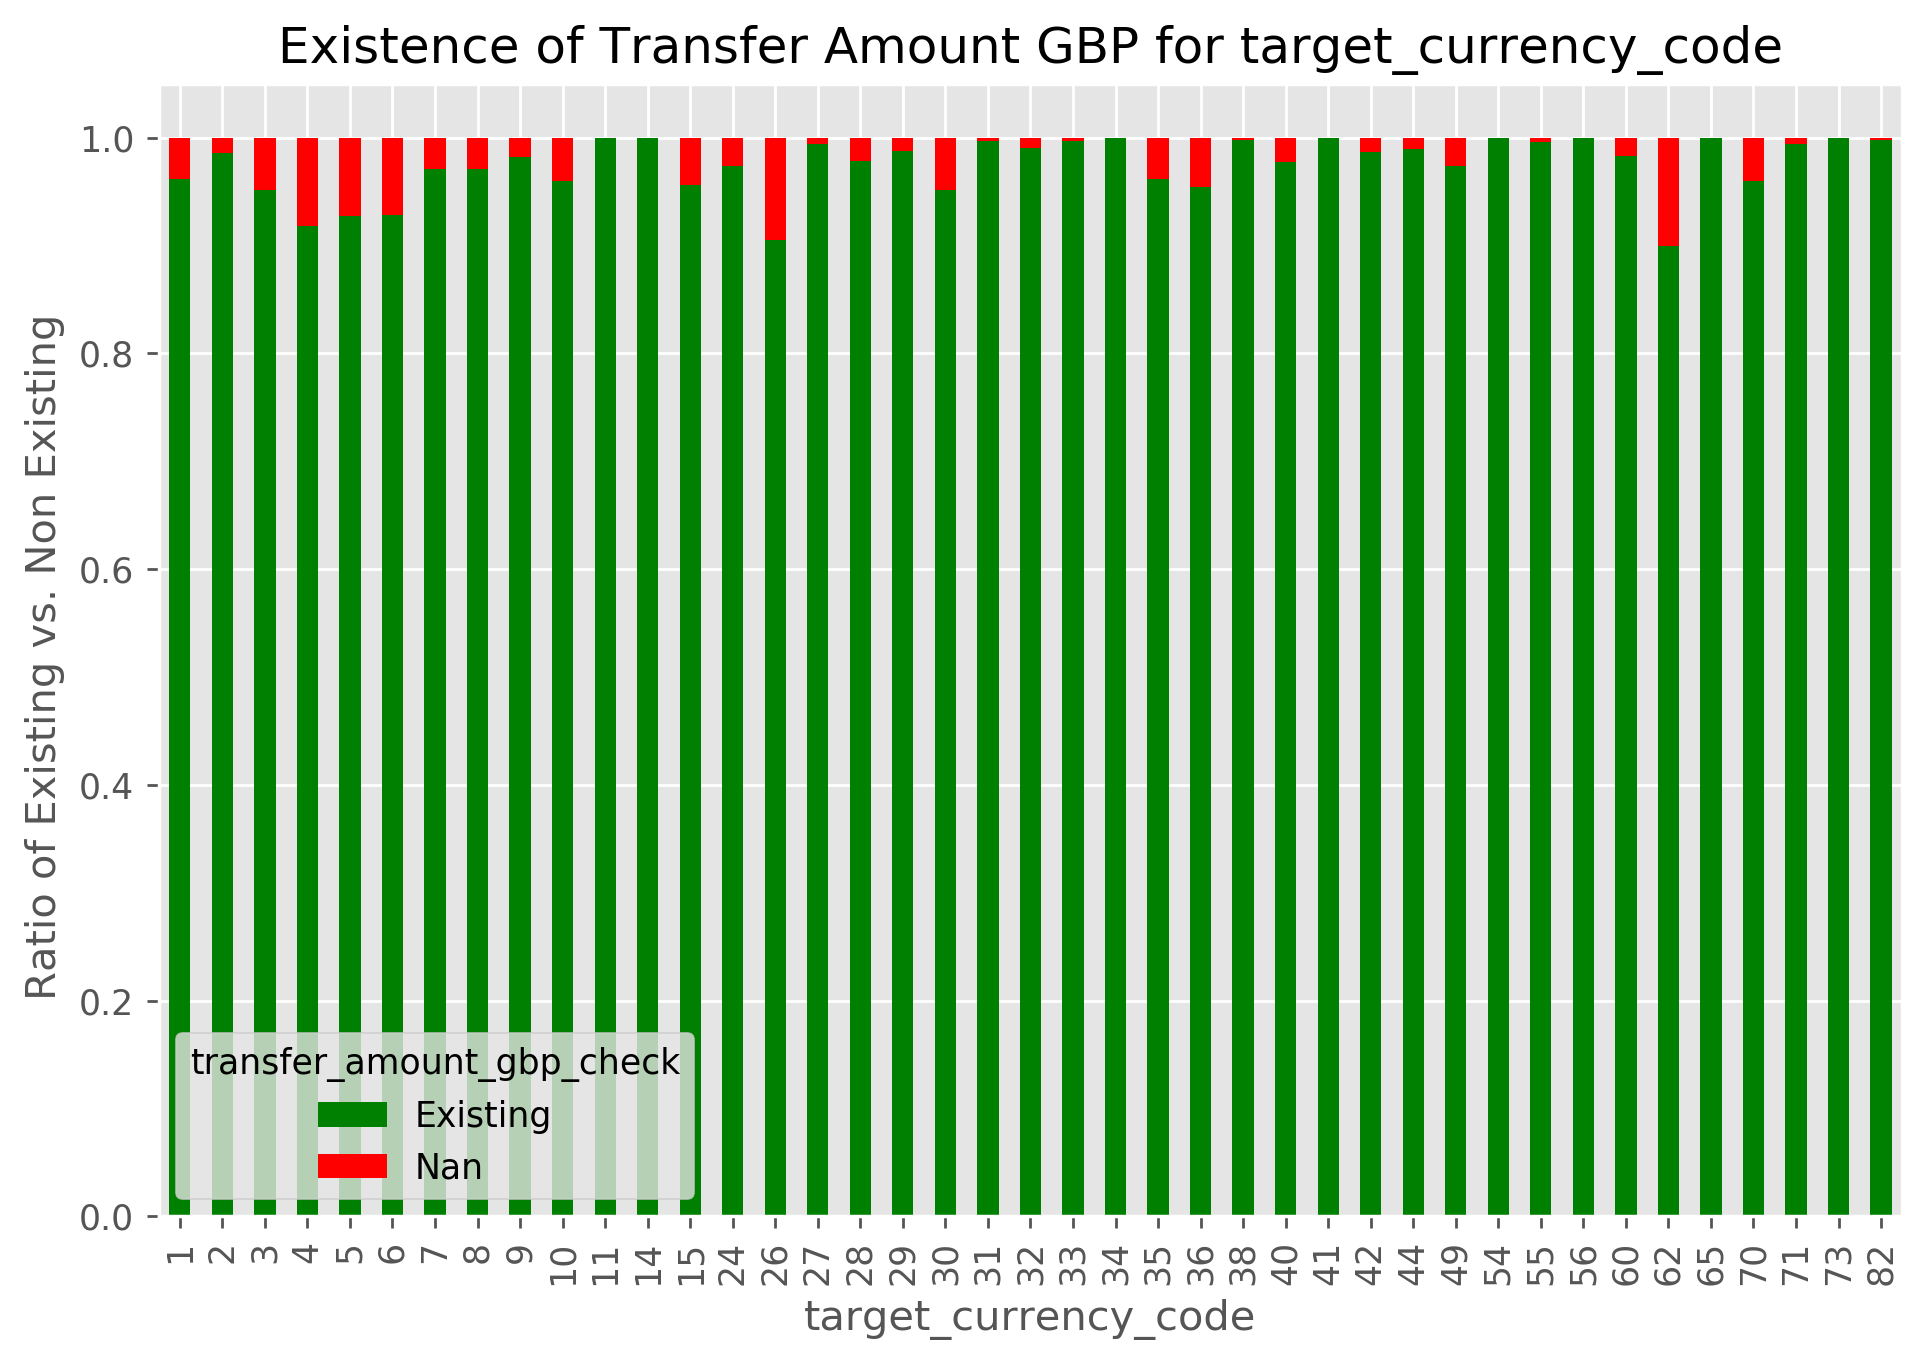

In [36]:
plot_1(dataset,"target_currency_code")

# Check for possible outliers outside 1.5 IQR

In [37]:
numeric_dataset = dataset.select_dtypes(include=['int','float'])
numeric_dataset

,transfer_amount_gbp,sum_of_this_user
0,6056.0,11156.0
1,1359.0,6331.0
2,1571.0,4556.0
3,8323.0,163168.0
4,1571.0,19636.0
...,...,...
72357,NaN,0.0
72358,NaN,0.0
72359,NaN,0.0
72360,NaN,0.0


**It seems like only features that can suitably be assessed for being outside the IQR are 'transfer_amount_gbp'.** 

In [38]:
datacolumn=numeric_dataset.transfer_amount_gbp
sorted(datacolumn)
Q1,Q3 = np.nanpercentile(datacolumn , [25,75])
IQR = Q3 - Q1
lower_range = Q1 - (1.5 * IQR)
upper_range = Q3 + (1.5 * IQR)
print(lower_range,upper_range)

-2184.0 4376.0


In [39]:
data_outside_IQR=numeric_dataset[(numeric_dataset.transfer_amount_gbp < lower_range) \
                                 | (numeric_dataset.transfer_amount_gbp > upper_range)]

In [40]:
print("\n\nPercentage of Non-Missing values outside 1.5 IQR : ",\
      round(len(data_outside_IQR)/dataset['transfer_amount_gbp'].notnull().sum(),4)*100)



Percentage of Non-Missing values outside 1.5 IQR :  9.0


In [41]:
data_outside_IQR=dataset[(dataset.transfer_amount_gbp < lower_range) | (dataset.transfer_amount_gbp > upper_range)]

In [42]:
pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)
pd.options.display.max_columns = None

display(data_outside_IQR.describe(include=['category']))


/home/abdul/anaconda3/envs/BDA/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  This is separate from the ipykernel package so we can avoid doing imports until


,profile_type,user_language,age_years_bucket,user_country_code,payment_status,payment_reference_classification,source_currency_code,target_currency_code,deposit_receive_time_check,transfer_amount_gbp_check
count,6131,6131,6131,6131,6131,6131,6131,6131,6131,6131
unique,2,8,5,44,2,25,15,39,2,1
top,Personal,EN,3. 26-34,134,Transferred,blank,2,26,Existing,Existing
freq,5968,5106,3334,3810,3269,3329,1785,3645,3366,6131


**The data with values outside IQR covers most categories of other features. Hence, it is not advisable to remove the values that are outside IQR as by removeing them we may lose valuable information.**

**In addition, just like wealth distribution in the world, where some small fraction of people have worlds most wealth, similarly, some users of Transferwise can be rich and have large transfer amounnts,**

**Hence, it may not be reasonable to remove values outside IQR especially since we do not information on how the statistical model built on top it will react to these values**

# Logically Incorrect Values

In [43]:
dataset['submit_receive_Diff'] = dataset['deposit_receive_time'].sub\
                (dataset['transfer_submit_time']).dt.days
dataset[(dataset.submit_receive_Diff < 0) & (dataset.transfer_amount_gbp != np.nan)]\
        [['user_id_hashed','transfer_submit_time','deposit_receive_time','submit_receive_Diff']]

,user_id_hashed,transfer_submit_time,deposit_receive_time,submit_receive_Diff
8633,60132e3f0d,2016-11-03 16:29:55,2016-11-03 10:00:00,-1.0
8869,aeee61c1d5,2016-11-04 10:00:25,2016-11-04 10:00:00,-1.0
8870,19ef11b701,2016-11-04 10:02:19,2016-11-04 10:00:00,-1.0
8871,19ef11b701,2016-11-04 10:03:20,2016-11-04 10:00:00,-1.0
9005,d055fceaff,2016-11-04 14:58:47,2016-11-04 10:00:00,-1.0
...,...,...,...,...
27698,d329793a38,2017-01-16 13:38:32,2017-01-16 13:38:31,-1.0
30453,e704437807,2017-01-26 23:39:40,2017-01-26 21:42:39,-1.0
68684,f32892cf59,2016-11-07 14:40:49,2016-11-07 10:00:00,-1.0
68718,5ac3706a4d,2016-11-09 16:47:00,2016-11-09 10:00:00,-1.0


**The above 205 rows logically incorrect values of 'transfer_submit_time' and 'deposit_receive_time' pair. This is because transfer_submit_time seems to be later than deposit_Receive_time which is logically incorrect.**